# ECE 657A - Assignment 1
**Date Submitted:** February 04, 2022

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np

# Charting
import seaborn as sns
sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
from scipy import stats

# Misc
import warnings
warnings.filterwarnings("ignore")

# Question 1: Assessment of Data

## Abalone Dataset
We begin by looking at the features of the dataset itself.

In [2]:
# Columns/Features of Dataset
abalone_columns = ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
# Loading the Data set

abalone_df=pd.read_csv('abalone.csv',names=abalone_columns)

### 1. Exploratory Data Analysis

In [3]:
abalone_df.head() #Top 5 rows of the dataframe

Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7

In [4]:
print(abalone_df.shape)#number of rows and columns respectively
abalone_df.describe() #describes the data for each column : count, mean, standard deviation, min, IQR percentiles, max

(4177, 9)


Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8.000000  
50%          0.171000      0.234000     9.000000  
75%          0.253000      0.329000    11.000000  
max          0.760000      1.005000    29.000000

In [5]:
abalone_df.info() #info about the datatype of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


#### 1.1 Feature Analysis 

##### 1.1.1 Univariate Analysis

Initially, we take up each column separately and then explore the ranges of the columns

1.1.1.1 Gender distribution

We look at the categorical data first and it's distribution on the entire dataset. We have made a pie chart to explain the total distribution of the category 'Sex' on the dataset.

Text(0.5, 1.0, 'Percentage distribution of the category (SEX)')

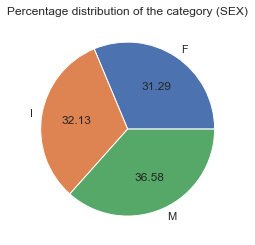

In [6]:
abalone_df.groupby('Sex').size().plot(kind='pie', autopct='%.2f')
plt.ylabel("")
plt.title("Percentage distribution of the category (SEX)")

We find that all three categories - M,F,I are almost equally distributed among the dataset with a little extra records for the M category.

In [7]:
#Creating a function to plot similar Histogram for showing distribution according to category for different features
def plot_histogram_against_sex(field, b): 
    plt.figure(figsize=(10,3))
    sns.distplot(abalone_df.loc[abalone_df['Sex']=='M'][field],bins=b,kde=True,label="M")
    sns.distplot(abalone_df.loc[abalone_df['Sex']=='F'][field],bins=b,kde=True,label="F")
    sns.distplot(abalone_df.loc[abalone_df['Sex']=='I'][field],bins=b,kde=True,label="I")
    plt.legend()
    plt.title("Histogram distribution for {} according to Sex".format(field))
    plt.xlabel(field)
    plt.ylabel("Frequency Distribution")
    plt.show()

Then, we move on to exploring range and distribution frequency of various features on the basis of sex. We are doing that by plotting histograms for the features. We are plotting histograms because this is singular feature analysis.

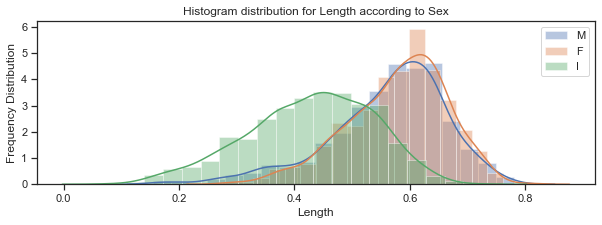

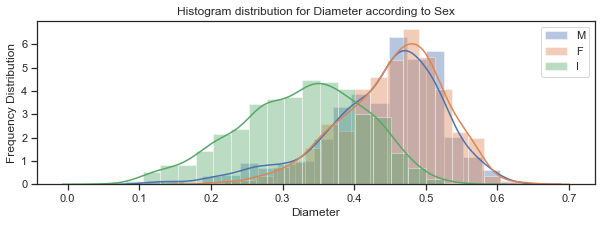

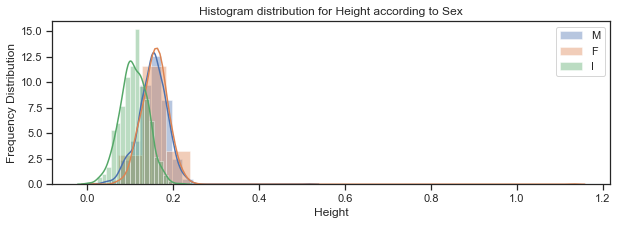

In [8]:
plot_histogram_against_sex("Length",20) # Histogram of length on basis of sex
plot_histogram_against_sex("Diameter",20) # Histogram of diameter on basis of sex
plot_histogram_against_sex("Height",20) # Histogram of height on basis of sex

1.1.1.2 Weight measurements analysis

Now, we explore the weight categories similarly using the histogram plot. 

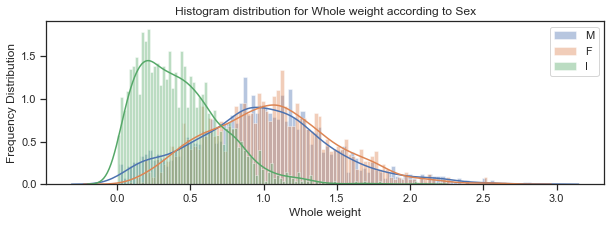

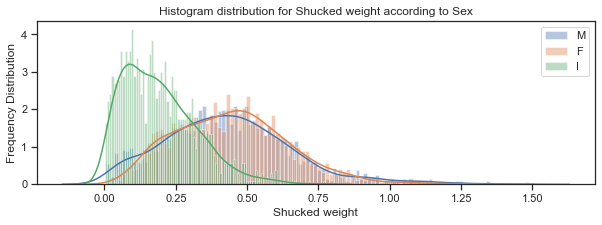

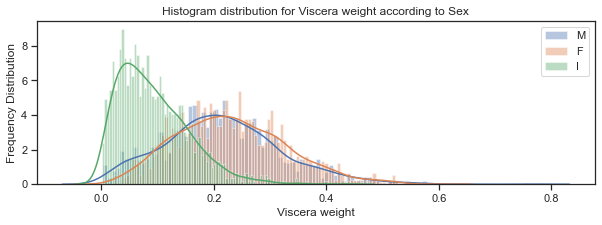

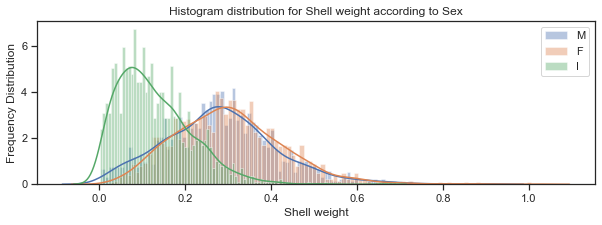

In [9]:
plot_histogram_against_sex("Whole weight",100) # Histogram of Whole weight on basis of sex
plot_histogram_against_sex("Shucked weight",100) # Histogram of Shucked weight on basis of sex
plot_histogram_against_sex("Viscera weight",100) # Histogram of Viscera weight on basis of sex
plot_histogram_against_sex("Shell weight",100) # Histogram of Shell weight on basis of sex

1.1.1.3 Rings distribution

Rings frequency distribution is explored separately because this is our target value in the dataset.

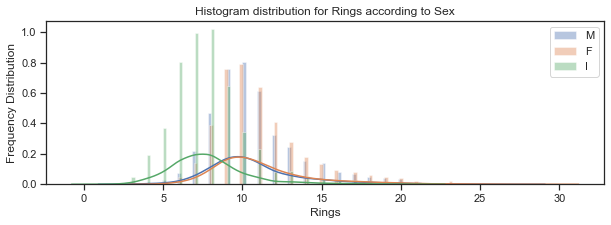

In [10]:
# Histogram of Rings on basis of sex
plot_histogram_against_sex("Rings",100) 

We also look at the data frequency distribution by plotting all the histograms at once to show their ranges and variations.

array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>],
       [<AxesSubplot:title={'center':'Whole weight'}>,
        <AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>],
       [<AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'Rings'}>, <AxesSubplot:>]],
      dtype=object)

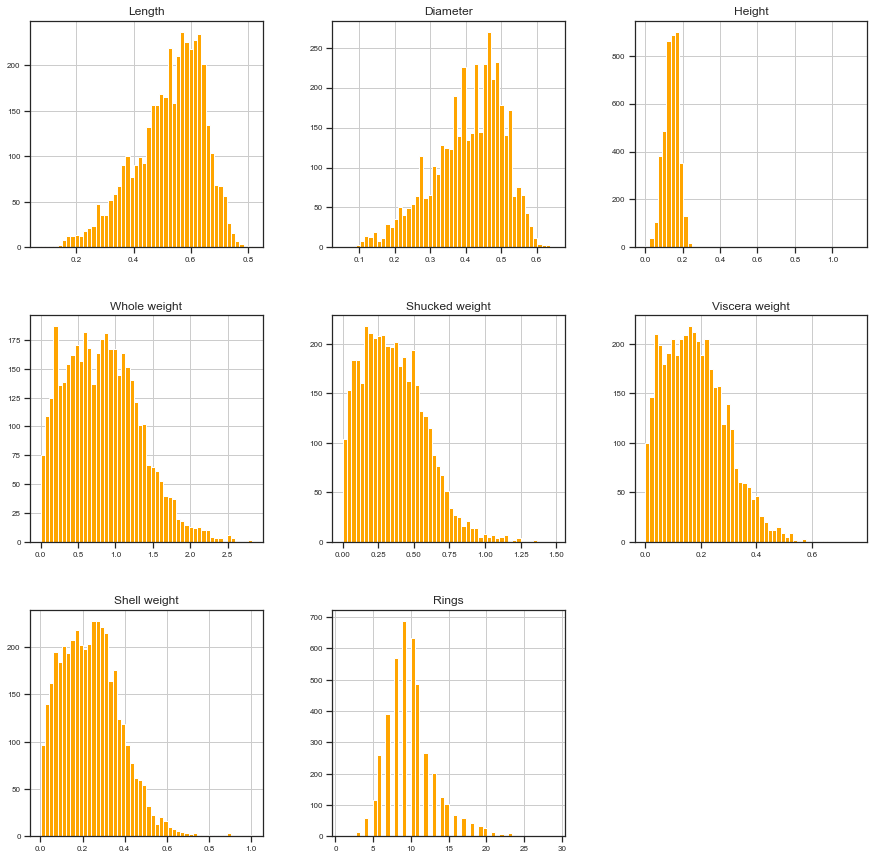

In [11]:
#Plotting histograms for looking at the data distribution separately at once
abalone_df.hist(figsize=(15, 15), bins=50, xlabelsize=8, ylabelsize=8, color = "orange")

#### 1.1.2 Bivariate Analysis

This analysis is being done to compare any two features together and see their relations with each other.
To do so, we will make pair plots on the basis of the 'Sex' category column for all other features

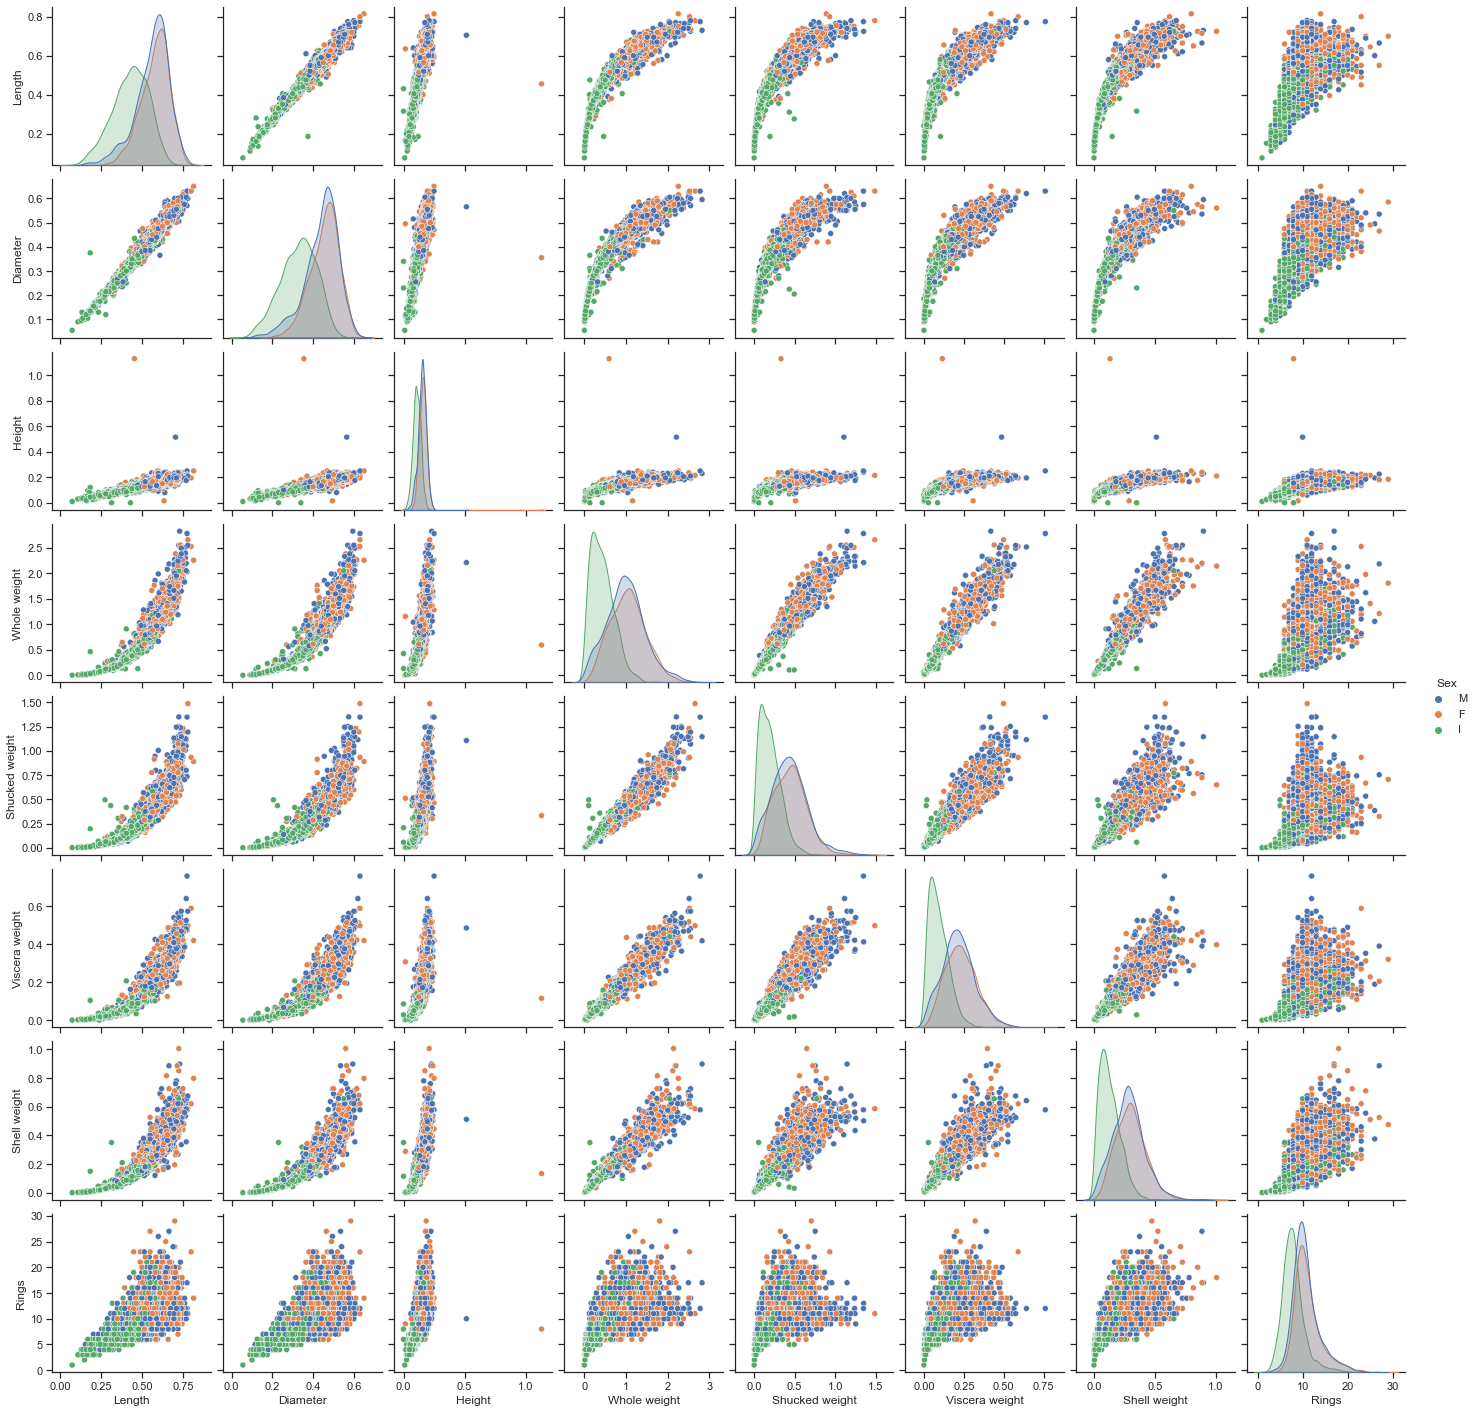

In [12]:
# Plotting the Pair-plots for all numerical columns with respect to each other categorised by the sex column
sns.pairplot(abalone_df, hue="Sex", vars=('Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings'))

By looking at the pairplots, we can see that some fields like whole weight, shucked weight, viscera weight and shell weight are correlated because they are creating an almost linear graph when they are plotted together on a graph. 
The fields Length and Diameter are also closely correlated because they have a perfect linear graph when plotted together.


The pair plots showed the correlation quite strongly but to emphasize it more prominently we shall make a heatmap to find very clearly what fields are correlated.

<AxesSubplot:>

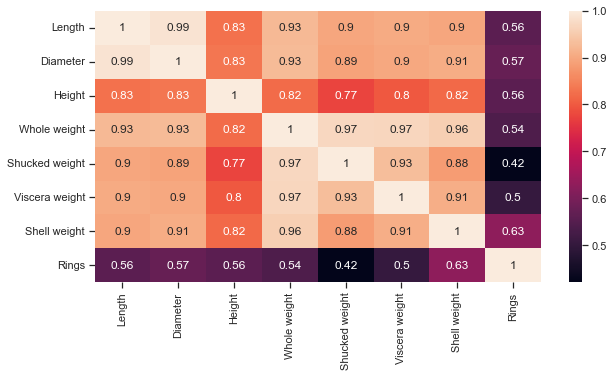

In [13]:
plt.figure(figsize=(10,5))
sns.heatmap(abalone_df.corr(method='pearson'),annot=True)

As expected and seen from the pairplots plotted above, we can see that weight categories are correlated.
But the most correlated fields are Diameter and Length.

### 2. Do we have any missing data?

In [14]:
abalone_df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

To check for missing values we used the is_null function with sum function. Since the output values of all columns are zeroes, we can conclude that there is no missing data in the dataset

We will also plot a scatterplot to show whether or not there is any missing data

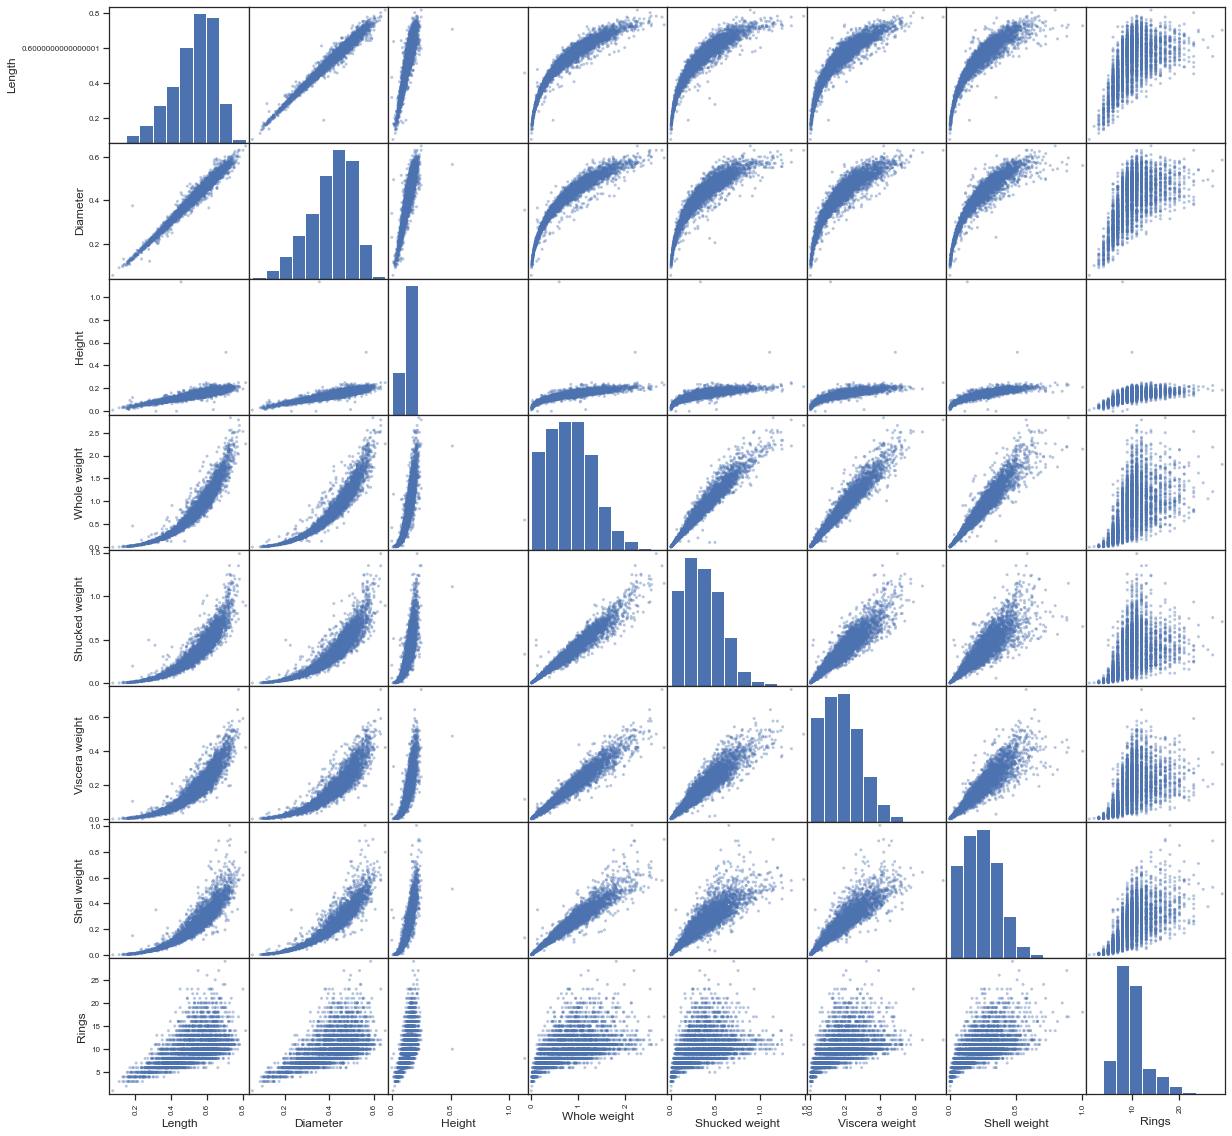

In [15]:
scatterplot = pd.plotting.scatter_matrix(abalone_df, alpha=0.4, figsize=(20,20))

Since, in the scatter plot, we can't seem to find any missing holes or missing chunks of data, we will conclude there is no missing data.

### 3. Diversity of Data

We will make a boxplot to plot the range of all features to see how diverse the data is in terms of the range distribution.

<AxesSubplot:>

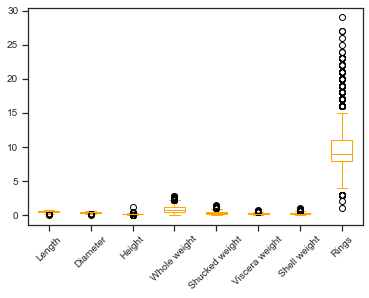

In [16]:
temp_df = abalone_df.drop(columns=['Sex'])#dropping sex as it is a categorical column
pd.plotting.boxplot(temp_df , grid=False, rot=45, fontsize=10, color="orange")

We will drop the 'Rings' column as clearly seen in the above graph that it's range is totally different from our other features.

<AxesSubplot:>

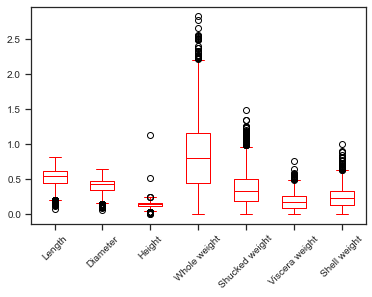

In [17]:
temp_df1 = temp_df.drop(columns=['Rings'])
pd.plotting.boxplot(temp_df1, grid=False, rot=45, fontsize=10, color="red")

Here, in the above graph we see that columns whole weight and height have a quite a varying range from the other columns. So, we will drop whole weight and height columns to see the diversity of other columns more clearly.

<AxesSubplot:>

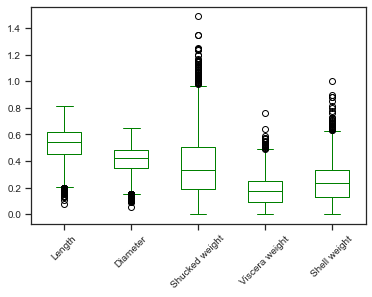

In [18]:
temp_df2 = temp_df1.drop(columns=['Whole weight','Height'])
pd.plotting.boxplot(temp_df2, grid=False, rot=45, fontsize=10, color="green")

Analyzing from the past 3 graphs where the range is quite varying for all features, we conclude that normalization is required for this dataset.

### 4. Outliers

<AxesSubplot:>

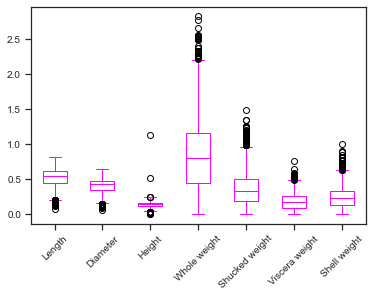

In [19]:
abalone_features_df = abalone_df.drop(columns=['Sex','Rings']) # removing category and target value
pd.plotting.boxplot(abalone_features_df, grid=False, rot=45, fontsize=10, color="magenta")

We can clearly see some outliers in the ranges, to show it more prominently we'll plot separate boxplots for range.

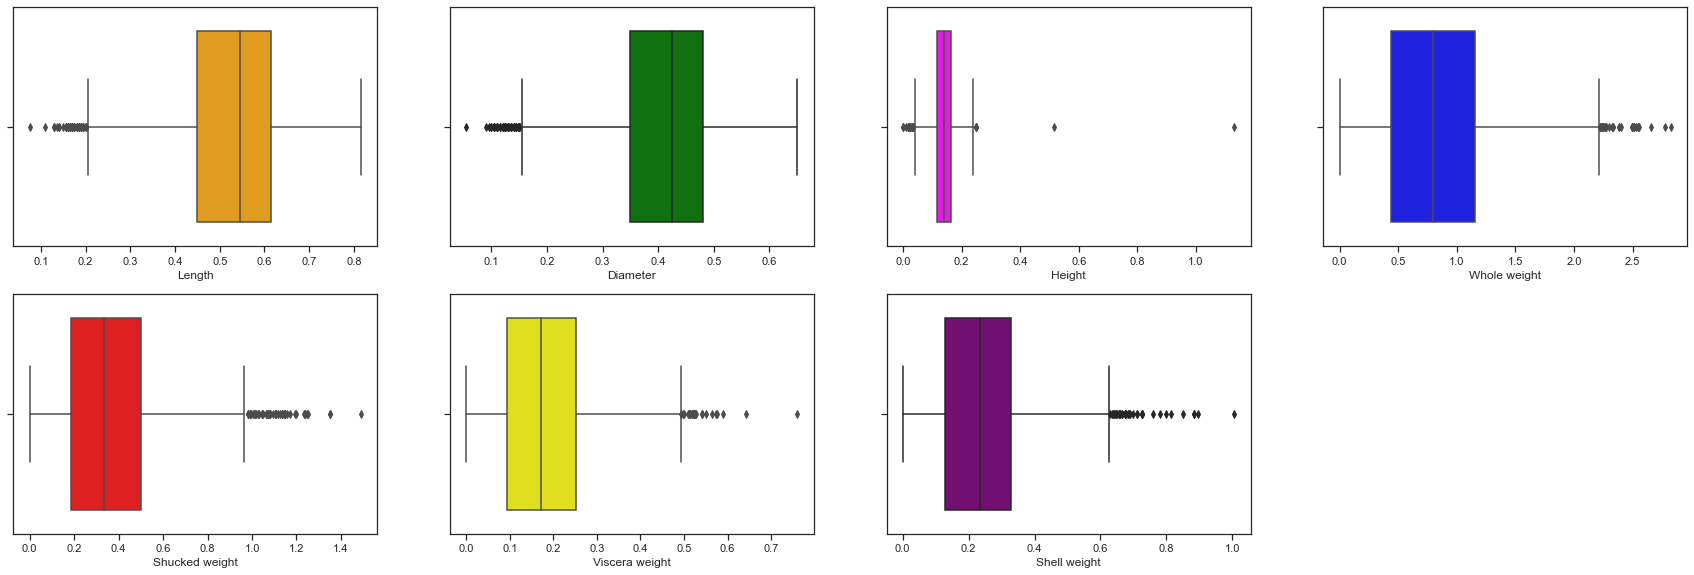

In [20]:
plt.figure(figsize=(30, 15))

rows = 3
cols = 4
i = 0


i += 1
plt.subplot(rows, cols, i)
_ = sns.boxplot(abalone_features_df['Length'], color="orange")

i += 1
plt.subplot(rows, cols, i)
_ = sns.boxplot(abalone_features_df['Diameter'], color="green")

i += 1
plt.subplot(rows, cols, i)
_ = sns.boxplot(abalone_features_df['Height'], color="magenta")

i += 1
plt.subplot(rows, cols, i)
_ = sns.boxplot(abalone_features_df['Whole weight'], color="blue")

i += 1
plt.subplot(rows, cols, i)
_ = sns.boxplot(abalone_features_df['Shucked weight'], color="red")

i += 1
plt.subplot(rows, cols, i)
_ = sns.boxplot(abalone_features_df['Viscera weight'], color="yellow")

i += 1
plt.subplot(rows, cols, i)
_ = sns.boxplot(abalone_features_df['Shell weight'], color="purple")


There are clearly prominent outliers in each of the feature as can be seen from the boxplots.
The outliers can be just errors as they cannot be naturally occuring. It can be instantiated with an example from the outliers of the height features, all the values of abalone fish height lie in 0 to 0.2 but one height has value more than 1. 

### 5. Is our data set balanced?

In [21]:
abalone_df.Sex.unique()

abalone_df['Sex'] = abalone_df['Sex'].replace(['M'],'0')
abalone_df['Sex'] = abalone_df['Sex'].replace(['F'],'1')
abalone_df['Sex'] = abalone_df['Sex'].replace(['I'],'2')

To check for the balance in the dataset, we will plot a count plot to see the distribution. If it is a proper bell curve, then it is a balanced set, otherwise it is not. 

<AxesSubplot:xlabel='Rings', ylabel='count'>

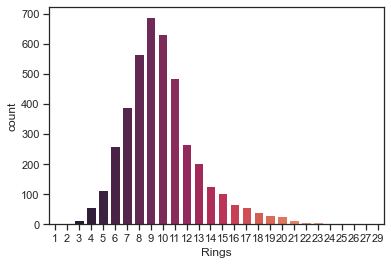

In [22]:
sns.countplot(x=abalone_df['Rings'],data=abalone_df, palette='rocket')

We can clearly see that the count plot that is made is a bit skewed and doesn't make a proper bell curve which means data is unbalanced.

Yes, the dataset is still usable as it not totally unbalanced but slightly unbalanced as can be seen from the slight skewness of the graph.

### 6. Normalization

### Before Normalization

We shall now begin with the normalization of different numerical features of dataset excluding the target values.

To begin, we plot the histogram plots for checking the shape and range distribution of all features

array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>],
       [<AxesSubplot:title={'center':'Whole weight'}>,
        <AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>],
       [<AxesSubplot:title={'center':'Shell weight'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

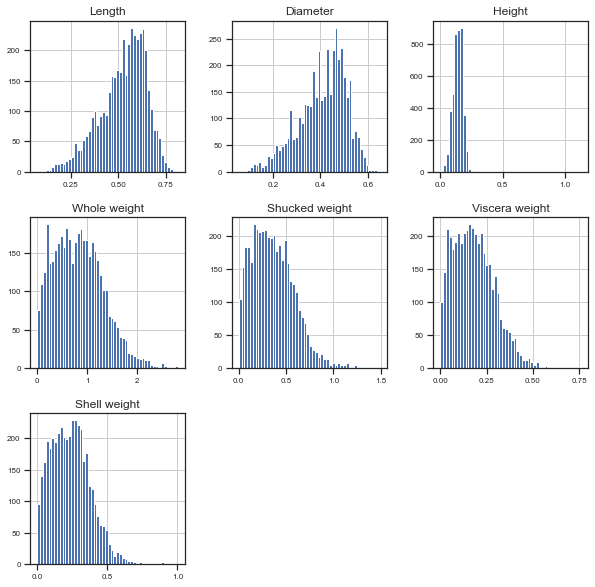

In [23]:
abalone_for_normalization = abalone_df.drop(columns=['Rings','Sex'])
abalone_for_normalization.hist(figsize=(10, 10), bins=50, xlabelsize=8, ylabelsize=8)

### After z-score Normalization

array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>],
       [<AxesSubplot:title={'center':'Whole weight'}>,
        <AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>],
       [<AxesSubplot:title={'center':'Shell weight'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

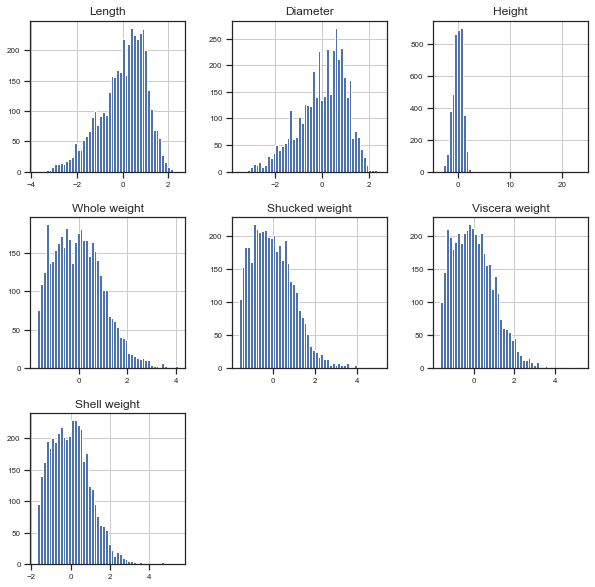

In [24]:
# With Z-score Normalization
abalone_zscore = abalone_for_normalization.apply(stats.zscore)
abalone_zscore.hist(figsize=(10, 10), bins=50, xlabelsize=8, ylabelsize=8)

By looking at each of the histograms of different columns with and without normalization respectively, we deduce that the shape of the graph remains preserved although the range around which all datapoints were centered has changed.

### Min-max Normalization


In [25]:
abalone_for_normalization = abalone_df.drop(columns=['Sex'])
#Minmax normalization
from sklearn.preprocessing import MinMaxScaler, StandardScaler
cols = list(abalone_for_normalization.columns)
scaler_minmax = MinMaxScaler()
features_data_x = abalone_for_normalization.drop('Rings', axis = 1).values
target_y = abalone_for_normalization['Rings'].values

X_minmax = scaler_minmax.fit_transform(features_data_x)

In [26]:
#Dataframe of minmax normalized data
abalone_minmax = pd.DataFrame(data=np.column_stack((X_minmax,target_y)),columns=cols)
abalone_minmax.head()

Length  Diameter    Height  Whole weight  Shucked weight  Viscera weight  \
0  0.513514  0.521008  0.084071      0.181335        0.150303        0.132324   
1  0.371622  0.352941  0.079646      0.079157        0.066241        0.063199   
2  0.614865  0.613445  0.119469      0.239065        0.171822        0.185648   
3  0.493243  0.521008  0.110619      0.182044        0.144250        0.149440   
4  0.344595  0.336134  0.070796      0.071897        0.059516        0.051350   

   Shell weight  Rings  
0      0.147982   15.0  
1      0.068261    7.0  
2      0.207773    9.0  
3      0.152965   10.0  
4      0.053313    7.0

It is very clear that the normalization still preserve the shape of the data for all predictors, however, on different scale. all data points were shifted to be centered around the zero and with unit variance)

### 6(a) Is normalization needed?
Yes, normalization is absolutely needed for this dataset as the ranges of different features are varying too much.

### 6(b,c) Unormalized Comparison of three values
To clearly observe the difference that normalization makes on dataset, we take specific columns choosing Diameter as a meaningful feature and then comparing it with other two features whole weight and shell weight under different normalization techniques.

In [27]:
# Plot one feature value, sorted from low to high, against two others
x=['Diameter']; y=['Whole weight','Shell weight']

In [28]:
abalone_temp = abalone_df[x+y]
abalone_temp.sort_values(by=x, inplace=True)
display(abalone_temp.describe())

Diameter  Whole weight  Shell weight
count  4177.000000   4177.000000   4177.000000
mean      0.407881      0.828742      0.238831
std       0.099240      0.490389      0.139203
min       0.055000      0.002000      0.001500
25%       0.350000      0.441500      0.130000
50%       0.425000      0.799500      0.234000
75%       0.480000      1.153000      0.329000
max       0.650000      2.825500      1.005000

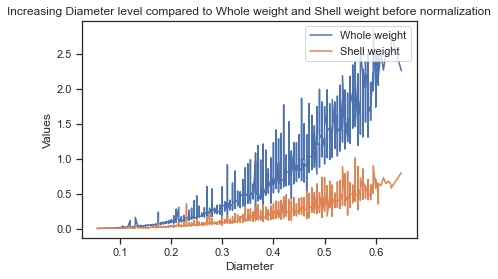

In [29]:
abalone_temp.plot(x=x[0], y=y)

plt.legend(loc='upper right')
plt.title('Increasing {} level compared to {} and {} before normalization'.format(x[0],y[0],y[1]))
plt.xlabel('Diameter')
plt.ylabel('Values')
plt.legend(loc='upper right')


When we look at Whole weight and Shucked weight as they correlate with 
Rings we see a major need for normalization. 

### Using Z-Score Normalization

We implement z-score normalization using the `sklearn.stats` package applied to the entire dataset. Then we once again select our columns of interest. Note that the x and y variables do not need to be updated since they are just the names of the columns being used and they do not change across the three examples.

In [30]:
abalone_zscore['Rings'] = abalone_df['Rings']
abalone_zscore['Sex'] = abalone_df['Sex']
abalone_zscore.head()

Length  Diameter    Height  Whole weight  Shucked weight  Viscera weight  \
0 -0.574558 -0.432149 -1.064424     -0.641898       -0.607685       -0.726212   
1 -1.448986 -1.439929 -1.183978     -1.230277       -1.170910       -1.205221   
2  0.050033  0.122130 -0.107991     -0.309469       -0.463500       -0.356690   
3 -0.699476 -0.432149 -0.347099     -0.637819       -0.648238       -0.607600   
4 -1.615544 -1.540707 -1.423087     -1.272086       -1.215968       -1.287337   

   Shell weight  Rings Sex  
0     -0.638217     15   0  
1     -1.212987      7   0  
2     -0.207139      9   1  
3     -0.602294     10   0  
4     -1.320757      7   2

In [31]:
abalone_temp = abalone_zscore[x+y]
abalone_temp.sort_values(by=x, inplace=True)
display(abalone_temp.describe())

Diameter  Whole weight  Shell weight
count  4.177000e+03  4.177000e+03  4.177000e+03
mean   1.053077e-15  4.231446e-16  7.601719e-16
std    1.000120e+00  1.000120e+00  1.000120e+00
min   -3.556267e+00 -1.686092e+00 -1.705134e+00
25%   -5.833158e-01 -7.897577e-01 -7.819095e-01
50%    1.725193e-01 -5.963767e-02 -3.470794e-02
75%    7.267984e-01  6.613049e-01  6.478319e-01
max    2.440025e+00  4.072271e+00  5.504642e+00

<Figure size 432x288 with 0 Axes>

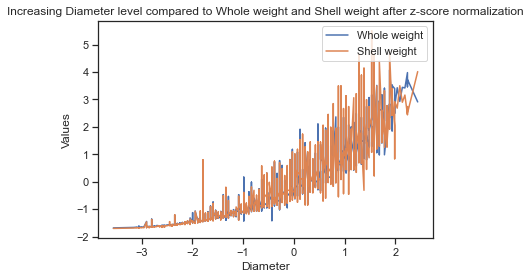

In [32]:
plt.figure()
abalone_temp.sort_values(by=x, inplace=True)
abalone_temp.plot(x=x[0], y=y)
plt.legend(loc='upper right')
plt.title('Increasing {} level compared to {} and {} after z-score normalization'.format(x[0],y[0],y[1]))
plt.xlabel('Diameter')
plt.ylabel('Values')
plt.legend(loc='upper right')

### Using min-max Normalization
This we simply implement ourselves since the formula is straightforward. the min() and max() functions will produce vectors of the respective values for every feature, then the formula below will normalize all the values of the new abalone minmax matrix appropriately. 

In [33]:
abalone_minmax.head()

Length  Diameter    Height  Whole weight  Shucked weight  Viscera weight  \
0  0.513514  0.521008  0.084071      0.181335        0.150303        0.132324   
1  0.371622  0.352941  0.079646      0.079157        0.066241        0.063199   
2  0.614865  0.613445  0.119469      0.239065        0.171822        0.185648   
3  0.493243  0.521008  0.110619      0.182044        0.144250        0.149440   
4  0.344595  0.336134  0.070796      0.071897        0.059516        0.051350   

   Shell weight  Rings  
0      0.147982   15.0  
1      0.068261    7.0  
2      0.207773    9.0  
3      0.152965   10.0  
4      0.053313    7.0

We can already see a significant difference here from the zscore summary tables, there are no very small or very large numbers any longer, these result from he large differences in scale and variance of the two feautures which zscore preserves.

<Figure size 432x288 with 0 Axes>

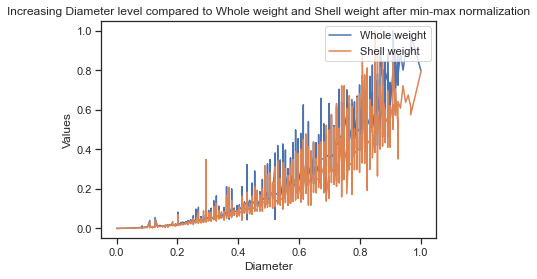

In [34]:
plt.figure()
abalone_minmax.sort_values(by=x, inplace=True)
abalone_minmax.plot(x=x[0], y=y)

plt.legend(loc='upper right')
plt.title('Increasing {} level compared to {} and {} after min-max normalization'.format(x[0],y[0],y[1]))
plt.xlabel('Diameter')
plt.ylabel('Values')
plt.legend(loc='upper right')

We can clearly see that by applying any of the z-score or min-max normalizations, the range graphs of whole weight and shell weight overlap. Hence, normalization is required.

# Wine Quality Data Set

In [35]:
#Columns/Features
D = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
L = 'quality'
C = 'color'
DL = D + [L]
DC = D + [C]
DLC = DL + [C]

#Loading Data set
wine_r = pd.read_csv("winequality-red.csv", sep=';')
#Loading Data set
wine_w = pd.read_csv("winequality-white.csv", sep=';')
wine_w= wine_w.copy()
wine_w[C]= np.zeros(wine_w.shape[0],dtype=int)
wine_r[C]= np.ones(wine_r.shape[0],dtype=int)
wine = pd.concat([wine_w,wine_r])

In [36]:
#Let's see what kind of features we have. 
wine.info()
print(wine.shape, wine_r.shape, wine_w.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   int32  
dtypes: float64(11), int32(1), int64(1)
memory usage: 685.2 KB
(6497, 13) (1599, 13) (4898, 13)


<Figure size 432x432 with 0 Axes>

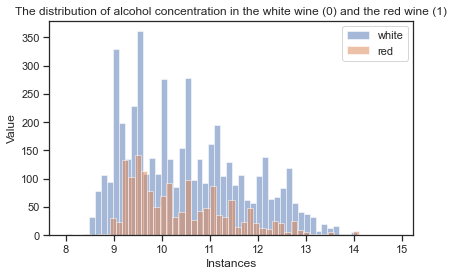

In [37]:
plt.figure(figsize=(6,6))
col='alcohol'
aw = wine_w.hist(column=col, bins=50, alpha=0.5, label="white")
wine_r.hist(column=col, bins=50, alpha=0.5, label="red", ax=aw)

plt.title('The distribution of {} concentration in the white wine (0) and the red wine (1)'.format(col))
plt.xlabel('Instances')
plt.ylabel('Value')
plt.legend(loc='upper right')
plt.grid()

plt.tight_layout()
plt.show()

In [38]:
#Checking for any null values
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

It seems there are no zeros or null entries in the dataset. To be more sure we can look at a scatterplot of all the data, and we see that there do not seem to be any large holes or irregular missing blocks. The bands of points for `quality` and `color` are the result of those features having a discrete set of values, they are categorical variables.

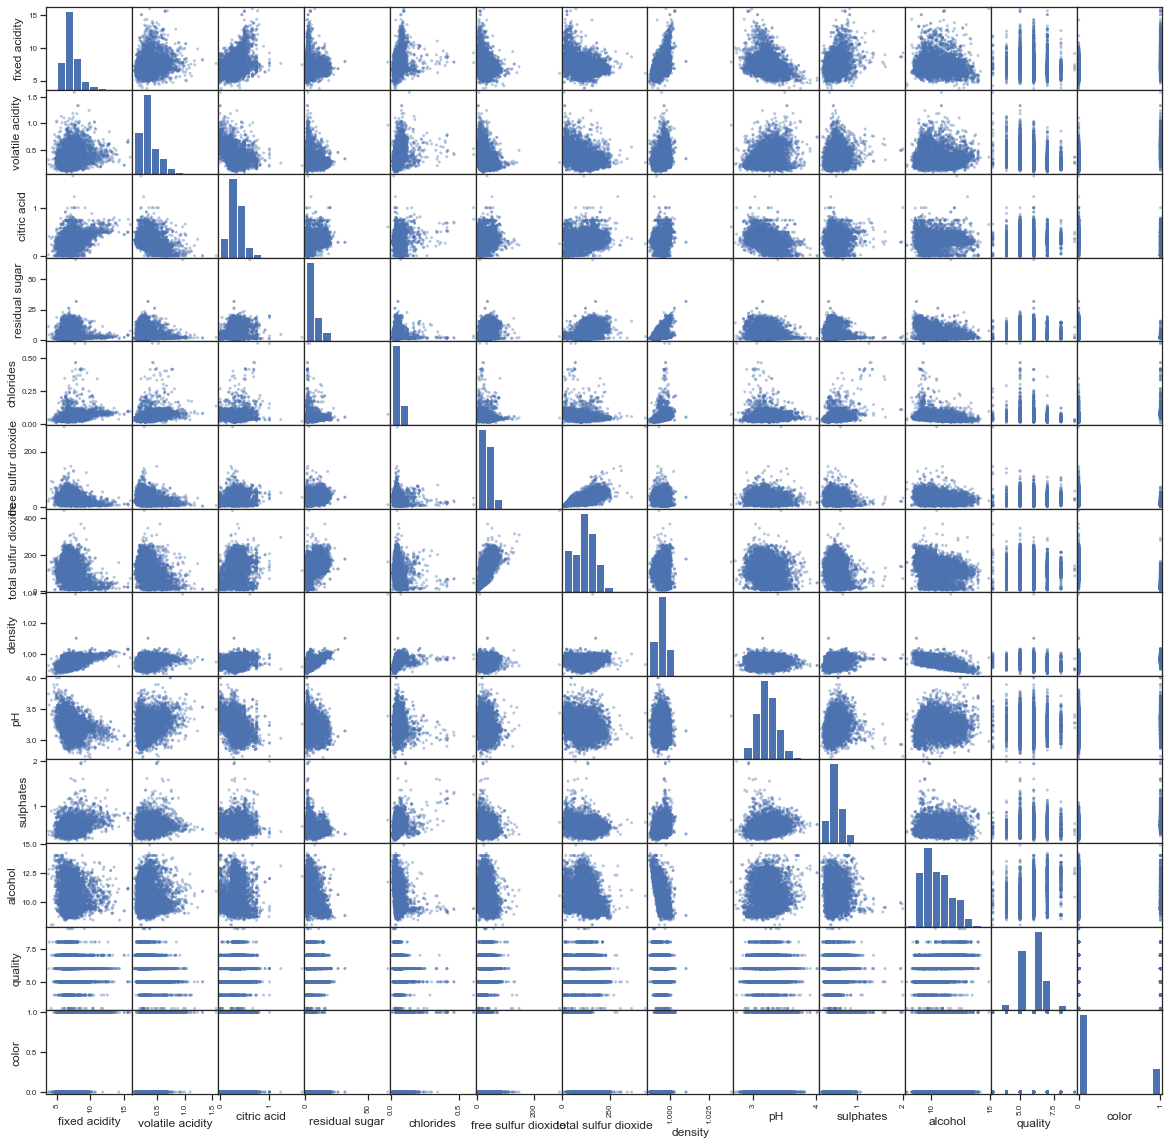

In [39]:
fig = pd.plotting.scatter_matrix(wine, alpha=0.4, figsize=(20,20))

<AxesSubplot:>

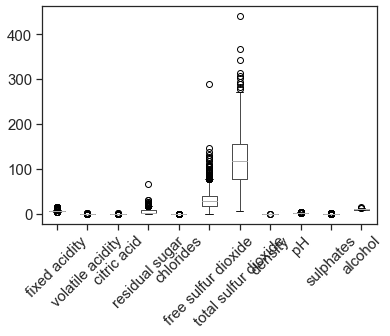

In [40]:
x = wine.drop(columns=['color', 'quality'])
pd.plotting.boxplot(x, grid=False, rot=45, fontsize=15)

<AxesSubplot:>

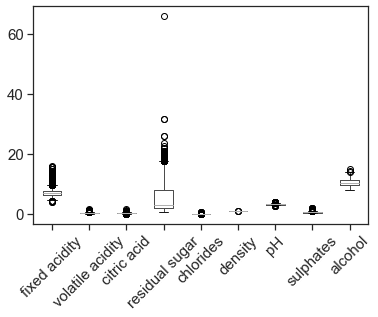

In [41]:
x = wine.drop(columns=['color', 'quality', 'free sulfur dioxide', 'total sulfur dioxide'])
pd.plotting.boxplot(x, grid=False, rot=45, fontsize=15)
#Even then, the remaining features have a wide range, so normalization will be critical.

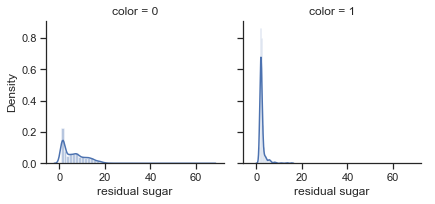

In [42]:
#Finding the outliers
g = sns.FacetGrid(wine, col="color")
g.map(sns.distplot, 'residual sugar',hist=True, kde=True)
g.add_legend();
#For the red wine, we can see less sugar on average comparing with its percentage in the white wine. 
#Also, it is clear that we have some outliers in the white wine with max value of 65.8 and average of 6.39!

Similar to the residual sugar distribution, we can see for the white wine the range of the free sulfur dioxide extends till 289 mg/dm^3 which is pretty far away from its average of 35mg/dm^3. On the other hand, the range of the same feature in the red wine samples is: max = 72 and min = 1 and average of 15.  

In [43]:
#is our dataset for wine quality balanced
wine.quality.unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

It looks like that we have only 7 levels of quality among all wine samples we have!
Thus, most of the wine samples of both types (white and red) classified with quality in the range of {5,6,7}. 

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>,
        <AxesSubplot:title={'center':'residual sugar'}>],
       [<AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>,
        <AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>],
       [<AxesSubplot:title={'center':'pH'}>,
        <AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>],
       [<AxesSubplot:title={'center':'color'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

<Figure size 432x288 with 0 Axes>

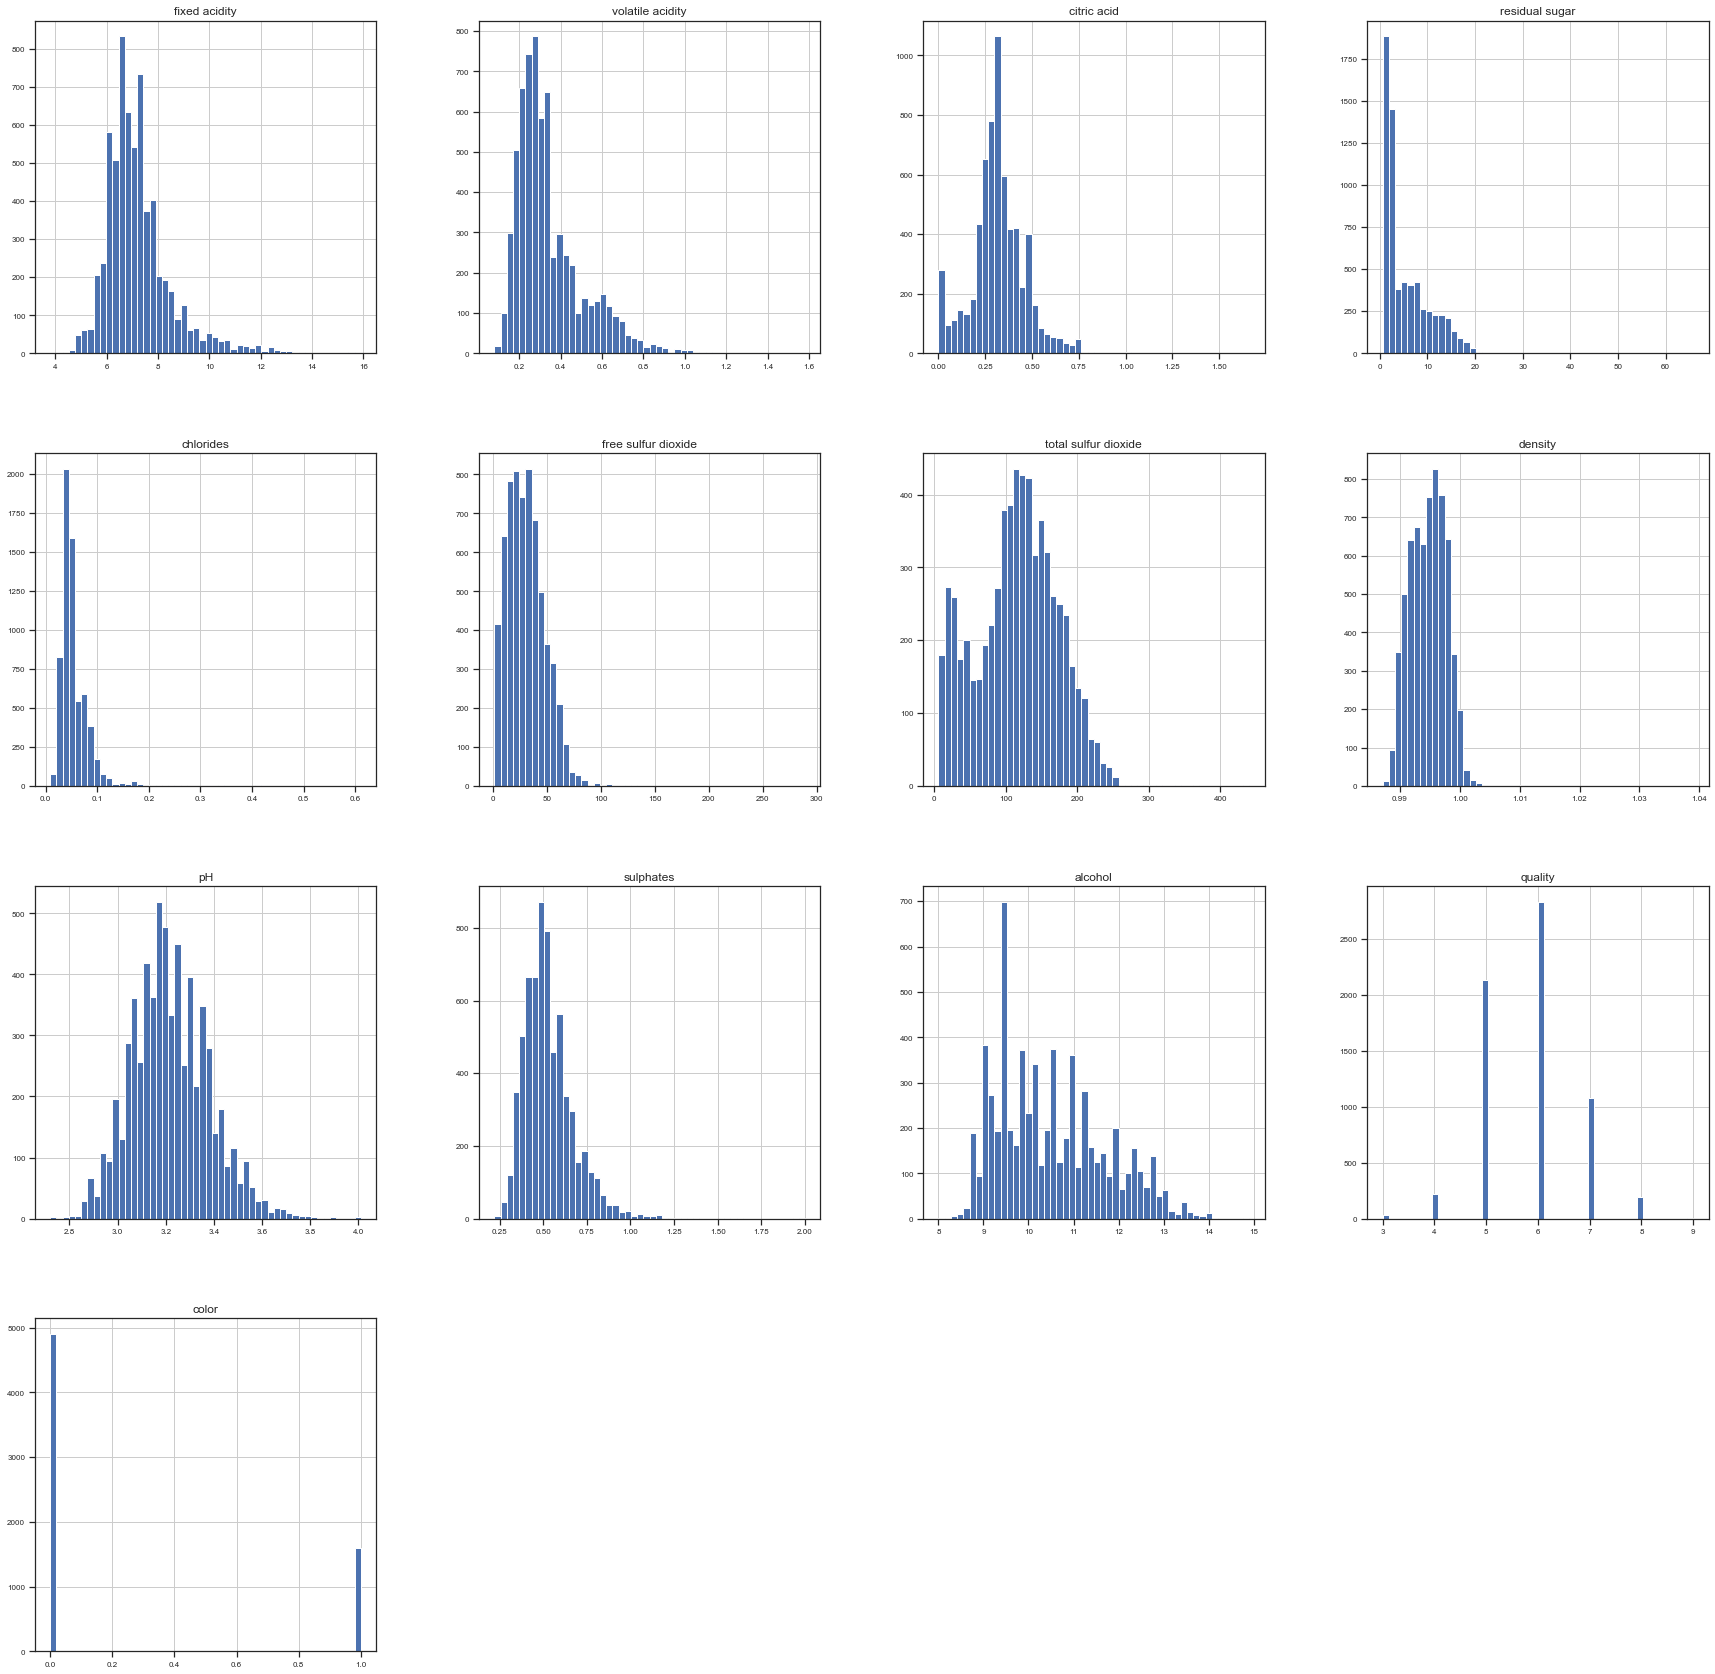

In [44]:
# Normalization
plt.figure()
wine.hist(figsize=(30, 30), bins=50, xlabelsize=8, ylabelsize=8)

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>,
        <AxesSubplot:title={'center':'residual sugar'}>],
       [<AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>,
        <AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>],
       [<AxesSubplot:title={'center':'pH'}>,
        <AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>],
       [<AxesSubplot:title={'center':'color'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

<Figure size 432x288 with 0 Axes>

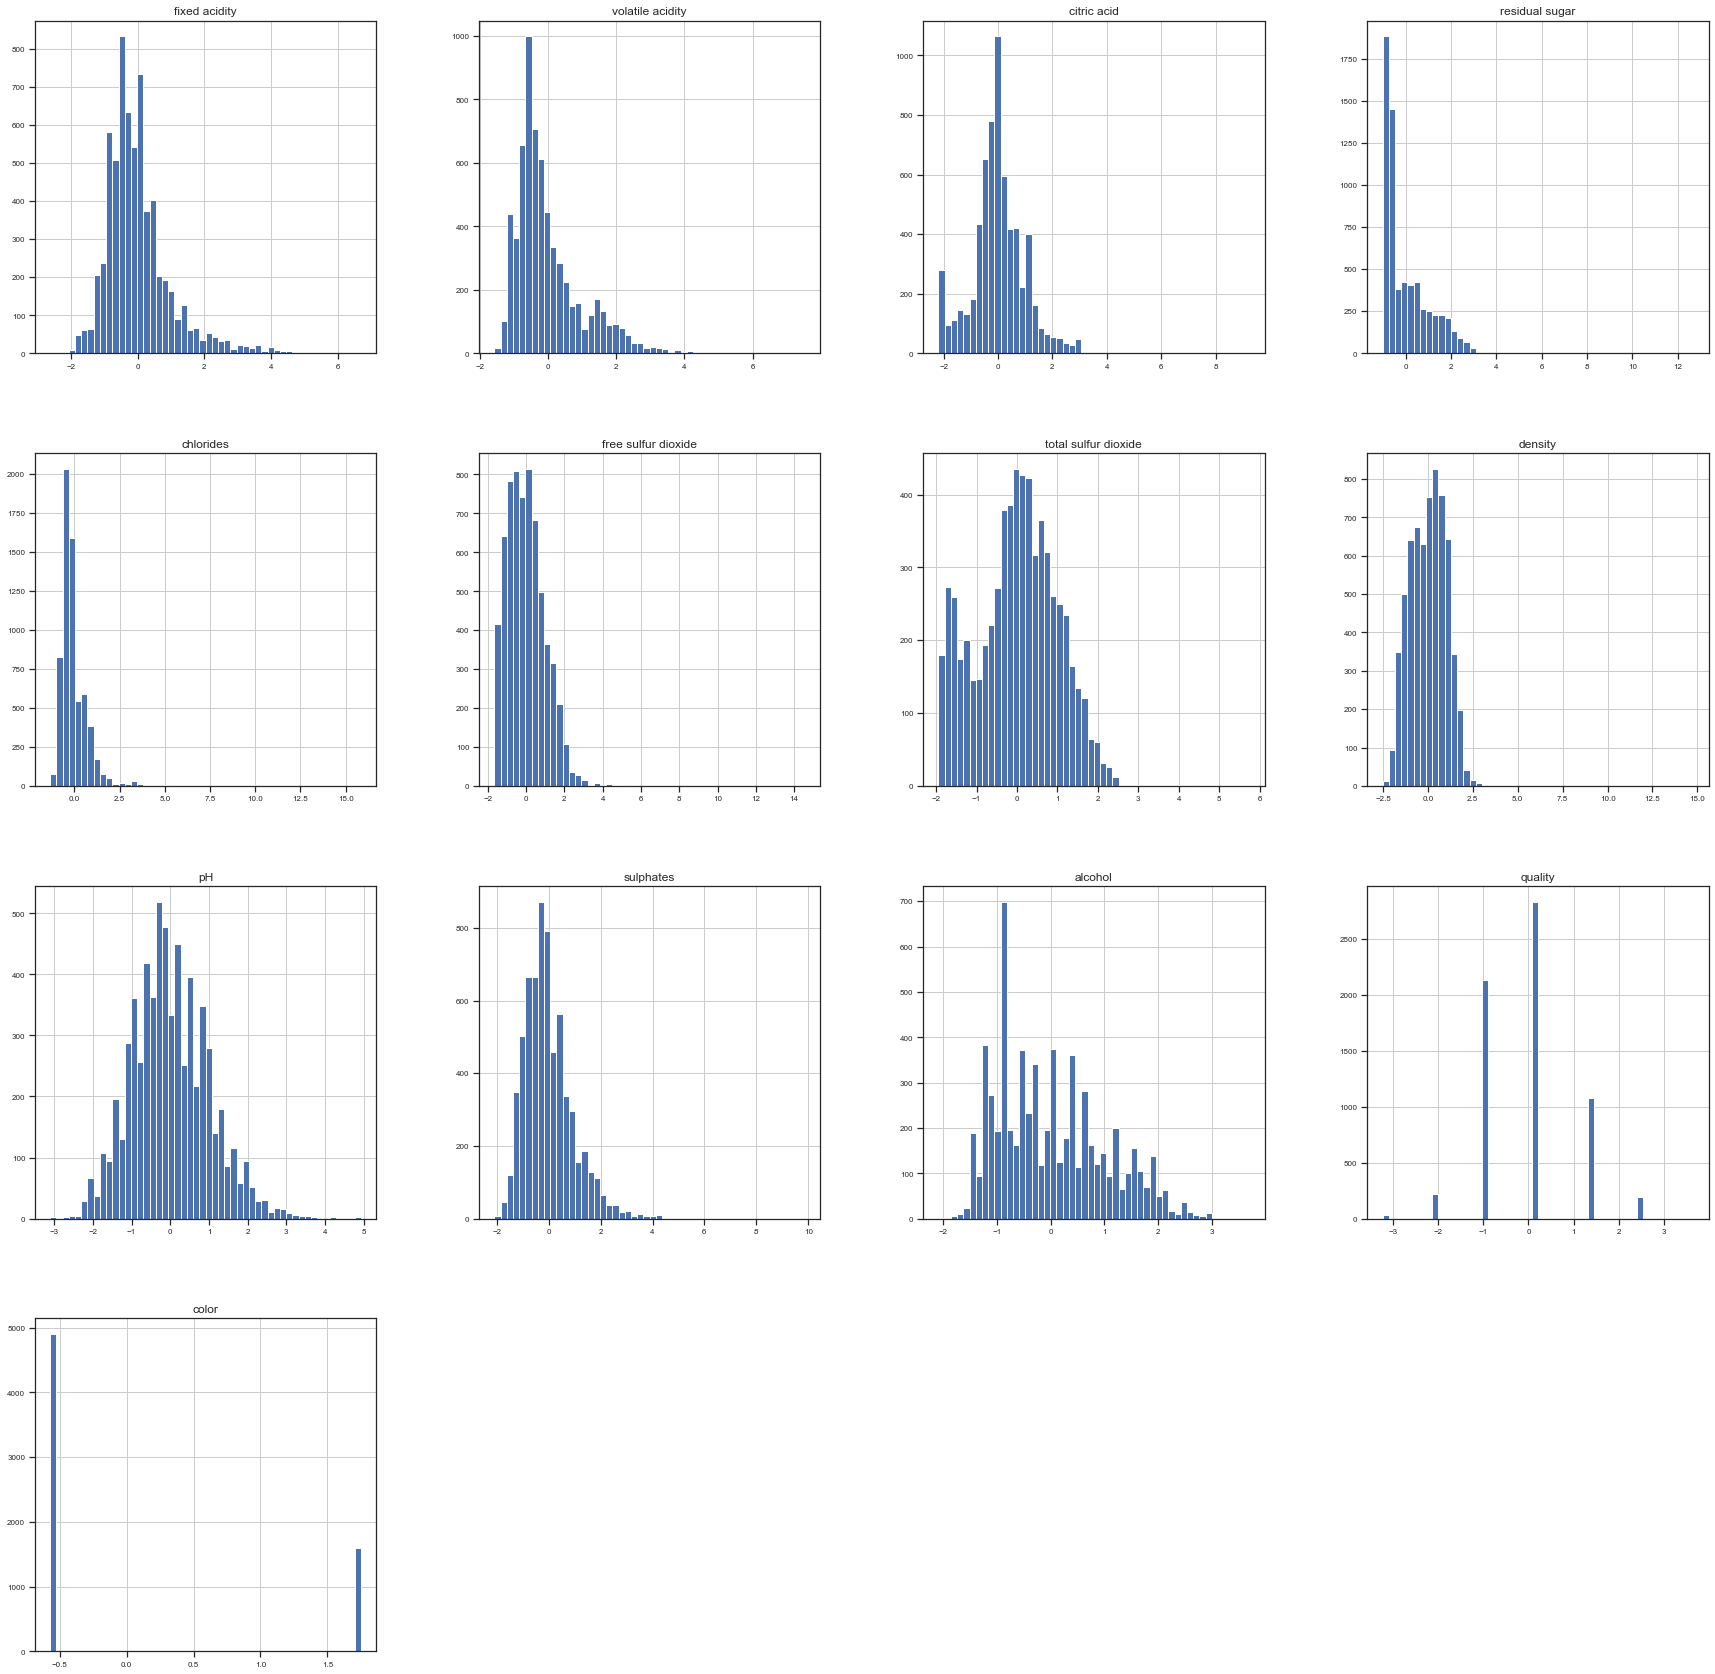

In [45]:
from scipy import stats
# Normalization with zscore 
plt.figure()
wine_znormalized = wine.apply(stats.zscore) # Repeated ahead
wine_znormalized.hist(figsize=(30, 30), bins=50, xlabelsize=8, ylabelsize=8)

It is very clear that the normalization still preserve the shape of the data for all predictors, however, on different scale. all data points were shifted to be centered around the zero and with unit variance)

We implement z-score normalization using the `sklearn.stats` package applied to the entire dataset. Then we once again select out the columns of interest. Note that the x and y variables do not need to be updated since they are just the names of the columns being used and they do not change across the three examples.

In [46]:
# Plot one feature value, sorted from low to high, against two others
x=['alcohol']; y=['pH','density']
w_aqc = wine[x+y]
w_aqc.sort_values(by=x, inplace=True)
display(w_aqc.describe())


alcohol           pH      density
count  6497.000000  6497.000000  6497.000000
mean     10.491801     3.218501     0.994697
std       1.192712     0.160787     0.002999
min       8.000000     2.720000     0.987110
25%       9.500000     3.110000     0.992340
50%      10.300000     3.210000     0.994890
75%      11.300000     3.320000     0.996990
max      14.900000     4.010000     1.038980

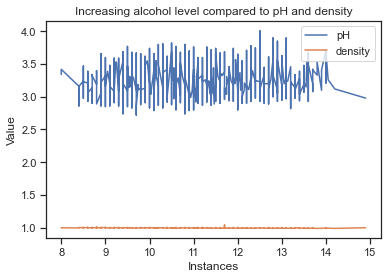

In [47]:
w_aqc.plot(x=x[0], y=y)
# w_aqc.hist(column=y, bins=10, alpha=.5)

plt.legend(loc='upper right')
plt.title('Increasing {} level compared to {} and {}'.format(x[0],y[0],y[1]))
plt.xlabel('Instances')
plt.ylabel('Value')
plt.legend(loc='upper right')

In [48]:
wine_zscore = wine.loc[:, ~wine.columns.isin(['quality', 'color'])].apply(stats.zscore)
wine_zscore["quality"] = wine["quality"]
wine_zscore["color"] = wine["color"]
w_aqc_zscore = wine_zscore[x+y]

w_aqc_zscore.sort_values(by=x, inplace=True)
display(w_aqc_zscore.describe())

alcohol            pH       density
count  6.497000e+03  6.497000e+03  6.497000e+03
mean  -3.439863e-15  2.998610e-15 -5.780439e-15
std    1.000077e+00  1.000077e+00  1.000077e+00
min   -2.089350e+00 -3.100615e+00 -2.530192e+00
25%   -8.316152e-01 -6.748622e-01 -7.859527e-01
50%   -1.608231e-01 -5.287424e-02  6.448888e-02
75%    6.776670e-01  6.313125e-01  7.648525e-01
max    3.696231e+00  4.923029e+00  1.476879e+01

In [49]:
wine_zscore.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.166089         -0.423183     0.284686        3.206929  -0.314975   
1      -0.706073         -0.240949     0.147046       -0.807837  -0.200790   
2       0.682458         -0.362438     0.559966        0.306208  -0.172244   
3      -0.011808         -0.666161     0.009406        0.642523   0.056126   
4      -0.011808         -0.666161     0.009406        0.642523   0.056126   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.815565              0.959976  2.102214 -1.359049  -0.546178   
1            -0.931107              0.287618 -0.232332  0.506915  -0.277351   
2            -0.029599             -0.331660  0.134525  0.258120  -0.613385   
3             0.928254              1.243074  0.301278 -0.177272  -0.882212   
4             0.928254              1.243074  0.301278 -0.177272  -0.882212   

    alcohol  quality  color  
0 -1.418558        6      0  
1 -0.831615        6      0  
2 -0.328521        6      0  
3 -0.496219        6      0  
4 -0.496219        6      0

<Figure size 432x288 with 0 Axes>

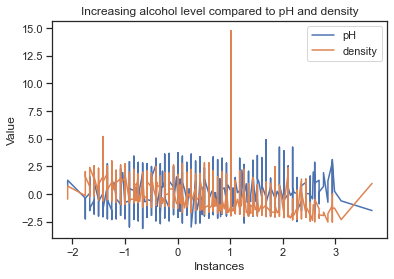

In [50]:
plt.figure()
w_aqc_zscore.sort_values(by=x, inplace=True)
w_aqc_zscore.plot(x=x[0], y=y)
plt.legend(loc='upper right')
plt.title('Increasing {} level compared to {} and {}'.format(x[0],y[0],y[1]))
plt.xlabel('Instances')
plt.ylabel('Value')
plt.legend(loc='upper right')

#### Using min-max Normalization
This we simply implement ourselves since the formula is straightforward. the min() and max() functions will produce vectors of the respective values for every feature, then the formula below will normalize all the values of the new wine-minmax matrix appropriately. 

In [51]:
wine_minmax = (wine-wine.min())/(wine.max()-wine.min())
wine_minmax["quality"] = wine["quality"]
wine_minmax["color"] = wine["color"]

w_aqc_minmax = wine_minmax[x+y]
display(w_aqc_minmax.describe())


alcohol           pH      density
count  6497.000000  6497.000000  6497.000000
mean      0.361131     0.386435     0.146262
std       0.172857     0.124641     0.057811
min       0.000000     0.000000     0.000000
25%       0.217391     0.302326     0.100829
50%       0.333333     0.379845     0.149990
75%       0.478261     0.465116     0.190476
max       1.000000     1.000000     1.000000

In [52]:
wine_minmax.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.264463          0.126667     0.216867        0.308282   0.059801   
1       0.206612          0.146667     0.204819        0.015337   0.066445   
2       0.355372          0.133333     0.240964        0.096626   0.068106   
3       0.280992          0.100000     0.192771        0.121166   0.081395   
4       0.280992          0.100000     0.192771        0.121166   0.081395   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.152778              0.377880  0.267785  0.217054   0.129213   
1             0.045139              0.290323  0.132832  0.449612   0.151685   
2             0.100694              0.209677  0.154039  0.418605   0.123596   
3             0.159722              0.414747  0.163678  0.364341   0.101124   
4             0.159722              0.414747  0.163678  0.364341   0.101124   

    alcohol  quality  color  
0  0.115942        6      0  
1  0.217391        6      0  
2  0.304348        6      0  
3  0.275362        6      0  
4  0.275362        6      0

We can already see a significant difference here from the zscore summary tables, there are no very small or very large numbers any longer, these result from he large differences in scale and variance of the two feautures which zscore preserves.

<Figure size 432x288 with 0 Axes>

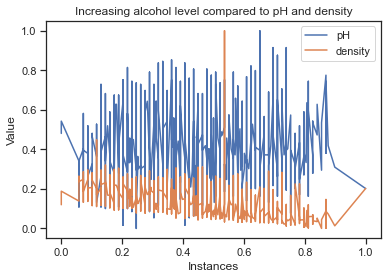

In [53]:
plt.figure()
w_aqc_minmax.sort_values(by=x, inplace=True)
w_aqc_minmax.plot(x=x[0], y=y)

plt.legend(loc='upper right')
plt.title('Increasing {} level compared to {} and {}'.format(x[0],y[0],y[1]))
plt.xlabel('Instances')
plt.ylabel('Value')
plt.legend(loc='upper right')

# 2. Classification for KNN

## 2.1. Abalone

In [54]:
# Using three datasets: unnormalized, zscore normalized and minmax normalized
abalone_dataframe_unnormal = abalone_df
abalone_dataframe_zscore = abalone_zscore
abalone_dataframe_minmax = abalone_minmax

abalone_target = "Rings" # Target variable

### 1. Divide the data into a training set and a test set (80%, 20%) Note: set the random seed for splitting, use random state=27 in the sci-kit learn train test split function to get the same split every time you run the program.

In [55]:
# Creating functions to generate a train-test split and analyzing the train test split
from sklearn.model_selection import train_test_split

def generate_train_test_splits(df,target):
    X = df.drop(target, axis = 1)
    y = df[target]

    # Train and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=27)
    return X_train, X_test, y_train, y_test

def analyze_train_test_splits(*args):
    for split in args:
        display(split.count())

In [56]:
# Train, test set for zscore normalized
abalone_zscore_X_train, abalone_zscore_X_test, abalone_zscore_y_train, abalone_zscore_y_test = generate_train_test_splits(abalone_dataframe_zscore,abalone_target)
# Train, test set for minmax normalized
abalone_minmax_X_train, abalone_minmax_X_test, abalone_minmax_y_train, abalone_minmax_y_test = generate_train_test_splits(abalone_dataframe_minmax,abalone_target)

print("\n*** Analysis for zscore normalized ***\n")
analyze_train_test_splits(abalone_zscore_X_train, abalone_zscore_X_test, abalone_zscore_y_train, abalone_zscore_y_test)

print("\n*** Analysis for minmax normalized ***\n")
analyze_train_test_splits(abalone_minmax_X_train, abalone_minmax_X_test, abalone_minmax_y_train, abalone_minmax_y_test)


*** Analysis for zscore normalized ***



Length            3341
Diameter          3341
Height            3341
Whole weight      3341
Shucked weight    3341
Viscera weight    3341
Shell weight      3341
Sex               3341
dtype: int64

Length            836
Diameter          836
Height            836
Whole weight      836
Shucked weight    836
Viscera weight    836
Shell weight      836
Sex               836
dtype: int64

3341

836


*** Analysis for minmax normalized ***



Length            3341
Diameter          3341
Height            3341
Whole weight      3341
Shucked weight    3341
Viscera weight    3341
Shell weight      3341
dtype: int64

Length            836
Diameter          836
Height            836
Whole weight      836
Shucked weight    836
Viscera weight    836
Shell weight      836
dtype: int64

3341

836

### 2. Start by training the model with the classifier’s default parameters. Use the train set and test the model on the test set. Note that different values of k will lead to different results.

In [57]:
# Defining wrapper functions for knn classification for reusability

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

# The below function accepts train-test splits, value of k, method(for weighted KNN) as "e"(euclidean) or "m"(manhattan) and returns accuracy
def knn_classify(X_train, X_test, y_train, y_test,n=None,method=None):
    knn_args = {}

    # Assessing the arguments
    if n is not None:
        knn_args['n_neighbors'] = n
    
    if method == "e":
        knn_args['weights'] = "distance"
        
    if method == "m":
        knn_args['weights'] = "distance"
        knn_args['metric'] = "manhattan"

    # Run KNN based upon arguments passed to the current function
    knn = KNeighborsClassifier(**knn_args) # Defining model
    knn.fit(X_train, y_train) # Running the model
    predictions = knn.predict(X_test) # Making predictions
    accuracy = accuracy_score(y_test,predictions) # Calculating accuracy
    return accuracy

# The below function is just to analyze the predictions, confusion matrix
def knn_analyze(predictions,y_test): 
    print("\n*** Confusion Matrix ***\n")
    print(confusion_matrix(y_test,predictions))
    
    print("\n*** Classification Report ***\n")
    print(classification_report(y_test,predictions))
    
    accuracy = accuracy_score(y_test,predictions)
    
    print("\n*** Accuracy ***\n")
    print(accuracy)

In [58]:
# Calculating accuracy for default value of k i.e. 5
abalone_zscore_accuracy = knn_classify(abalone_zscore_X_train, abalone_zscore_X_test, abalone_zscore_y_train, abalone_zscore_y_test)
abalone_minmax_accuracy = knn_classify(abalone_minmax_X_train, abalone_minmax_X_test, abalone_minmax_y_train, abalone_minmax_y_test)

In [59]:
print("Accuracy for zscore = {}".format(abalone_zscore_accuracy))
print("Accuracy for minmax = {}".format(abalone_minmax_accuracy))

Accuracy for zscore = 0.22009569377990432
Accuracy for minmax = 0.215311004784689


### 3. To find the best value for k, you need to compute accuracy for a range of values of k so you can “tune” the classifier. Using these scores, plot a figure of accuracy vs k. Report the best k in terms of classification accuracy.

In [60]:
#k_values = [1,5,10,15,20,25,30,35]
k_values = range(4,100)
abalone_zscore_accuracies = []
abalone_minmax_accuracies = []

for k in k_values:
    acc1 = knn_classify(abalone_zscore_X_train, abalone_zscore_X_test, abalone_zscore_y_train, abalone_zscore_y_test,k)
    acc2 = knn_classify(abalone_minmax_X_train, abalone_minmax_X_test, abalone_minmax_y_train, abalone_minmax_y_test,k)
    
    abalone_zscore_accuracies.append(acc1)
    abalone_minmax_accuracies.append(acc2)

# Multiplying accuracies by 100 for better comparison
abalone_zscore_accuracies = [x*100 for x in abalone_zscore_accuracies]
abalone_minmax_accuracies = [x*100 for x in abalone_minmax_accuracies]

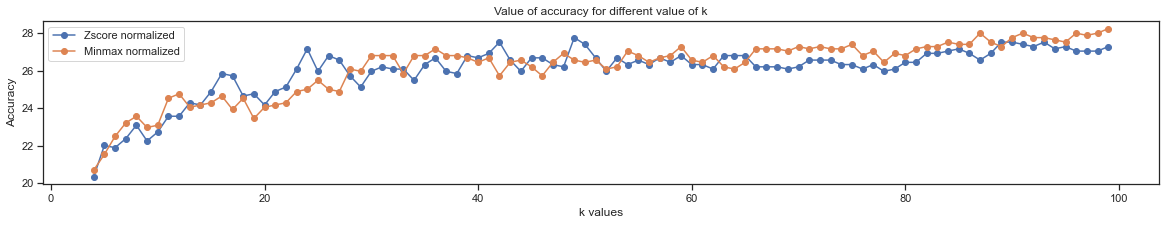

In [61]:
plt.figure(figsize=(20,3))
plt.plot(k_values, abalone_zscore_accuracies, marker='o')
plt.plot(k_values, abalone_minmax_accuracies, marker='o')

plt.xlabel("k values")
plt.ylabel("Accuracy")
plt.title("Value of accuracy for different value of k")
plt.legend(["Zscore normalized","Minmax normalized"])

In [62]:
# Finding the maximum accuracy
zscore_max_accuracy = max(abalone_zscore_accuracies)
minmax_max_accuracy = max(abalone_minmax_accuracies)

# Finding the best value of k
zscore_best_k = k_values[abalone_zscore_accuracies.index(zscore_max_accuracy)]
minmax_best_k = k_values[abalone_minmax_accuracies.index(minmax_max_accuracy)]

print("*** Best value of k for zscore = {} ***".format(zscore_best_k))
print("*** Best value of k for minmax = {} ***".format(minmax_best_k))

*** Best value of k for zscore = 49 ***
*** Best value of k for minmax = 99 ***


### 4. Improving on KNN: You can try to improve on your classification results using the method of weighted KNN. The KNeighborsClassifier class has an option for weighted KNN where points that are nearby to the query point are more important for the classification than others. Compare the three different weighting schemes (default, manhattan, euclidean) by plotting accuracy vs k for all three of them on the same figure to see the effect.

In [63]:
# Storing the accuracies for different k-values and different weighting parameters for zscore and minmax normalized data
abalone_zscore_accuracies_manhattan = []
abalone_zscore_accuracies_euclidean = []

abalone_minmax_accuracies_manhattan = []
abalone_minmax_accuracies_euclidean = []

# Using 'knn_classify' wrapper function defined above
for k in k_values:
    acc1_m = knn_classify(abalone_zscore_X_train, abalone_zscore_X_test, abalone_zscore_y_train, abalone_zscore_y_test,k,"m")
    acc1_e = knn_classify(abalone_zscore_X_train, abalone_zscore_X_test, abalone_zscore_y_train, abalone_zscore_y_test,k,"e")
    
    acc2_m = knn_classify(abalone_minmax_X_train, abalone_minmax_X_test, abalone_minmax_y_train, abalone_minmax_y_test,k,"m")
    acc2_e = knn_classify(abalone_minmax_X_train, abalone_minmax_X_test, abalone_minmax_y_train, abalone_minmax_y_test,k,"e")
    
    abalone_zscore_accuracies_manhattan.append(acc1_m)
    abalone_zscore_accuracies_euclidean.append(acc1_e)

    abalone_minmax_accuracies_manhattan.append(acc2_m)
    abalone_minmax_accuracies_euclidean.append(acc2_e)

In [64]:
# Multiplying accuracies by 100 for better comparison
abalone_zscore_accuracies_manhattan = [x*100 for x in abalone_zscore_accuracies_manhattan] 
abalone_zscore_accuracies_euclidean = [x*100 for x in abalone_zscore_accuracies_euclidean] 

abalone_minmax_accuracies_manhattan = [x*100 for x in abalone_minmax_accuracies_manhattan] 
abalone_minmax_accuracies_euclidean = [x*100 for x in abalone_minmax_accuracies_euclidean] 

*** Plot for Zscore normalized values ***


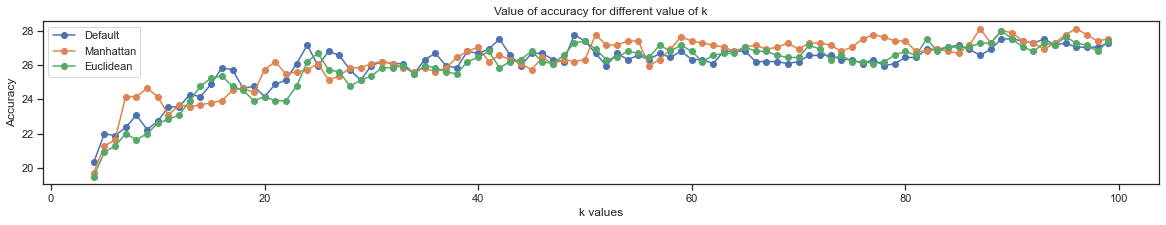

*** Plot for Minmax normalized values ***


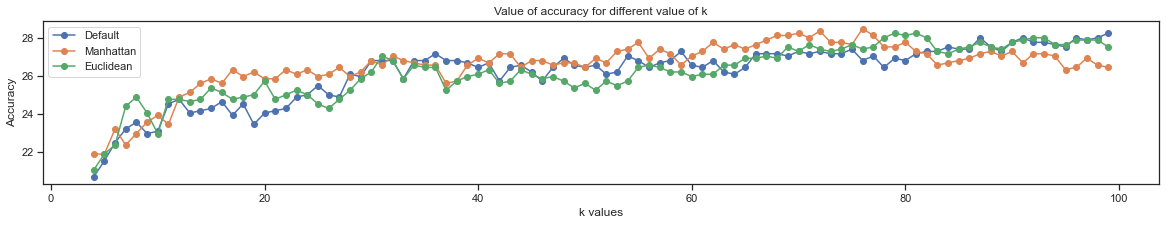

In [65]:
def accuracy_plot(default,manhattan,euclidean):
    plt.figure(figsize=(20,3))
    plt.plot(k_values, default, label='Default', marker='o')
    plt.plot(k_values, manhattan, label="Manhattan", marker='o')
    plt.plot(k_values, euclidean, label="Euclidean", marker='o')

    plt.xlabel("k values")
    plt.ylabel("Accuracy")
    plt.title("Value of accuracy for different value of k")
    plt.legend(["Default","Manhattan","Euclidean"])
    plt.show()

print("*** Plot for Zscore normalized values ***")
accuracy_plot(abalone_zscore_accuracies,abalone_zscore_accuracies_manhattan,abalone_zscore_accuracies_euclidean)

print("*** Plot for Minmax normalized values ***")
accuracy_plot(abalone_minmax_accuracies,abalone_minmax_accuracies_manhattan,abalone_minmax_accuracies_euclidean)

In [66]:
# Finding the maximum accuracy
zscore_max_accuracy_manhattan = max(abalone_zscore_accuracies_manhattan)
zscore_max_accuracy_euclidean = max(abalone_zscore_accuracies_euclidean)

print("*** Best accuracy from zscore = {} ***".format(max(zscore_max_accuracy,zscore_max_accuracy_manhattan,zscore_max_accuracy_euclidean)))

minmax_max_accuracy_manhattan = max(abalone_minmax_accuracies_manhattan)
minmax_max_accuracy_euclidean = max(abalone_minmax_accuracies_euclidean)

print("*** Best accuracy from minmax = {} ***".format(max(minmax_max_accuracy,minmax_max_accuracy_manhattan,minmax_max_accuracy_euclidean)))

# Finding the best value of k
zscore_best_k_manhattan = k_values[abalone_zscore_accuracies_manhattan.index(zscore_max_accuracy_manhattan)]
zscore_best_k_euclidean = k_values[abalone_zscore_accuracies_euclidean.index(zscore_max_accuracy_euclidean)]

minmax_best_k_manhattan = k_values[abalone_minmax_accuracies_manhattan.index(minmax_max_accuracy_manhattan)]
minmax_best_k_euclidean = k_values[abalone_minmax_accuracies_euclidean.index(minmax_max_accuracy_euclidean)]

print("*** Best value of k for zscore for manhattan distance metric= {} ***".format(zscore_best_k_manhattan))
print("*** Best value of k for zscore for euclidean distance metric= {} ***".format(zscore_best_k_euclidean))

print("*** Best value of k for minmax for manhattan distance metric= {} ***".format(minmax_best_k_manhattan))
print("*** Best value of k for minmax for euclidean distance metric= {} ***".format(minmax_best_k_euclidean))

*** Best accuracy from zscore = 28.11004784688995 ***
*** Best accuracy from minmax = 28.4688995215311 ***
*** Best value of k for zscore for manhattan distance metric= 87 ***
*** Best value of k for zscore for euclidean distance metric= 89 ***
*** Best value of k for minmax for manhattan distance metric= 76 ***
*** Best value of k for minmax for euclidean distance metric= 79 ***


### 5 Ablation Study on Normalization: An ablation study is where some aspect of the model or analysis is dropped, in order to see what its effect was on the entire outcome. We can do a simple form of ablation here by removing normalization from our pipeline. Replot the three curves from the previous question on weighted KNN, but this time remove the normalization step from the preprocessing. Comment on the difference, was normalization effective or necessary in this case?

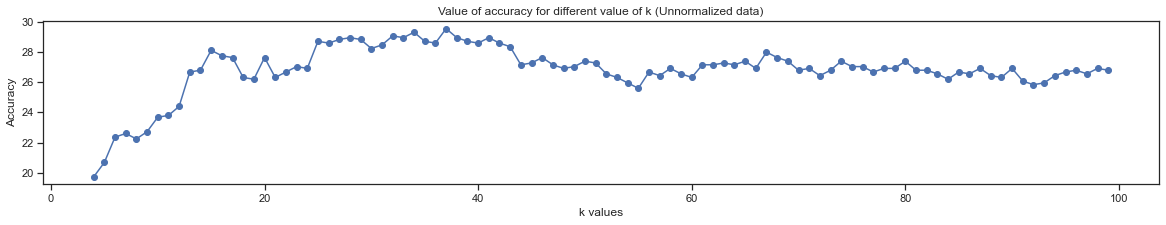

*** Plot for Unnormalized values ***


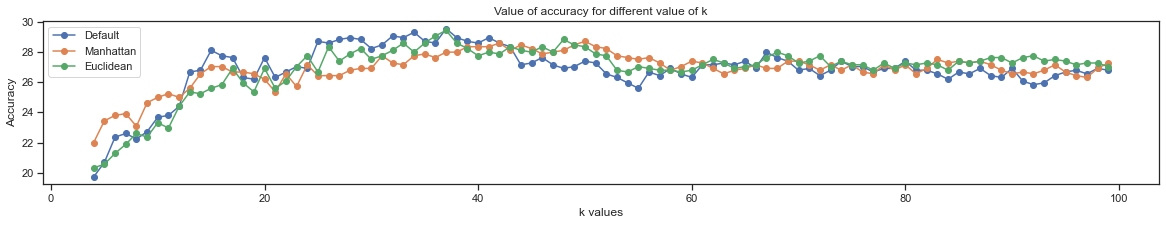

In [151]:
# Splitting unnormalized data into training and testing set
abalone_unnormal_X_train, abalone_unnormal_X_test, abalone_unnormal_y_train, abalone_unnormal_y_test = generate_train_test_splits(abalone_dataframe_unnormal,abalone_target)

# Calculating accuracy
abalone_unnormal_accuracy = knn_classify(abalone_unnormal_X_train, abalone_unnormal_X_test, abalone_unnormal_y_train, abalone_unnormal_y_test)

abalone_unnormal_accuracies = []
for k in k_values:
    acc1 = knn_classify(abalone_unnormal_X_train, abalone_unnormal_X_test, abalone_unnormal_y_train, abalone_unnormal_y_test,k)
    abalone_unnormal_accuracies.append(acc1)    
    
abalone_unnormal_accuracies = [x*100 for x in abalone_unnormal_accuracies]
plt.figure(figsize=(20,3))
plt.plot(k_values, abalone_unnormal_accuracies, marker='o')
plt.title("Value of accuracy for different value of k (Unnormalized data)")
plt.xlabel("k values")
plt.ylabel("Accuracy")
plt.show()

# Trying manhatten and euclidean metrics for unnormalized data
abalone_unnormal_accuracies_manhattan = []
abalone_unnormal_accuracies_euclidean = []

for k in k_values:
    acc1_m = knn_classify(abalone_unnormal_X_train, abalone_unnormal_X_test, abalone_unnormal_y_train, abalone_unnormal_y_test,k,"m")
    acc1_e = knn_classify(abalone_unnormal_X_train, abalone_unnormal_X_test, abalone_unnormal_y_train, abalone_unnormal_y_test,k,"e")
    abalone_unnormal_accuracies_manhattan.append(acc1_m)
    abalone_unnormal_accuracies_euclidean.append(acc1_e)

abalone_unnormal_accuracies_manhattan = [x*100 for x in abalone_unnormal_accuracies_manhattan] 
abalone_unnormal_accuracies_euclidean = [x*100 for x in abalone_unnormal_accuracies_euclidean]

print("*** Plot for Unnormalized values ***")
accuracy_plot(abalone_unnormal_accuracies,abalone_unnormal_accuracies_manhattan,abalone_unnormal_accuracies_euclidean)

In [152]:
# Finding the maximum accuracy
unnormal_max_accuracy = max(abalone_unnormal_accuracies)
unnormal_max_accuracy_manhattan = max(abalone_unnormal_accuracies_manhattan)
unnormal_max_accuracy_euclidean = max(abalone_unnormal_accuracies_euclidean)

print("*** Best accuracy from unnormalized data = {} ***".format(max(unnormal_max_accuracy,unnormal_max_accuracy_manhattan,unnormal_max_accuracy_euclidean)))

# Finding the best value of k
unnormal_best_k = k_values[abalone_unnormal_accuracies.index(unnormal_max_accuracy)]
unnormal_best_k_manhattan = k_values[abalone_unnormal_accuracies_manhattan.index(unnormal_max_accuracy_manhattan)]
unnormal_best_k_euclidean = k_values[abalone_unnormal_accuracies_euclidean.index(unnormal_max_accuracy_euclidean)]

print("*** Best value of k for unnormalized distance metric= {} ***".format(unnormal_best_k))
print("*** Best value of k for unnormalized for manhattan distance metric= {} ***".format(unnormal_best_k_manhattan))
print("*** Best value of k for unnormalized for euclidean distance metric= {} ***".format(unnormal_best_k_euclidean))

*** Best accuracy from unnormalized data = 29.545454545454547 ***
*** Best value of k for unnormalized distance metric= 37 ***
*** Best value of k for unnormalized for manhattan distance metric= 50 ***
*** Best value of k for unnormalized for euclidean distance metric= 37 ***


Conclusion: <br>
Best accuracy from zscore = 26.674641148325357 <br>
Best accuracy from minmax = 26.794258373205743<br>
Best accuracy from unnormalized data = 28.708133971291865<br>

**It is evident that we are achieving more accuracy with unnormalized value therefore normalization is not effective here**

## 2.2. Wine

In [153]:
# There are 2 target variables defined here
wine_target1 = "quality"
wine_target2 = "color"

# Shuffle the wine dataset because the dataset would be divided into 2 parts: one for red wine and other for white wine(while concatenation)
wine = wine.sample(frac=1).reset_index(drop=True)

# Using three datasets: unnormalized, zscore normalized and minmax normalized for each target variable: quality, color
wine_quality_dataframe_unnormal = wine.drop(wine_target2,axis=1)
wine_quality_dataframe_zscore = wine_zscore.drop(wine_target2,axis=1)
wine_quality_dataframe_minmax = wine_minmax.drop(wine_target2,axis=1)

wine_color_dataframe_unnormal = wine.drop(wine_target1,axis=1)
wine_color_dataframe_zscore = wine_zscore.drop(wine_target1,axis=1)
wine_color_dataframe_minmax = wine_minmax.drop(wine_target1,axis=1)

### 1. Divide the data into a training set and a test set (80%, 20%) Note: set the random seed for splitting, use random state=27 in the sci-kit learn train test split function to get the same split every time you run the program.

In [154]:
''' Quality '''
# Train, test set for zscore and minmax normalized
wine_quality_zscore_X_train, wine_quality_zscore_X_test, wine_quality_zscore_y_train, wine_quality_zscore_y_test = generate_train_test_splits(wine_quality_dataframe_zscore,wine_target1)
wine_quality_minmax_X_train, wine_quality_minmax_X_test, wine_quality_minmax_y_train, wine_quality_minmax_y_test = generate_train_test_splits(wine_quality_dataframe_minmax,wine_target1)

print("\n*** Analysis for zscore normalized ***\n")
analyze_train_test_splits(wine_quality_zscore_X_train, wine_quality_zscore_X_test, wine_quality_zscore_y_train, wine_quality_zscore_y_test)
print("\n*** Analysis for minmax normalized ***\n")
analyze_train_test_splits(wine_quality_minmax_X_train, wine_quality_minmax_X_test, wine_quality_minmax_y_train, wine_quality_minmax_y_test)

''' Color '''
# Train, test set for zscore and minmax normalized
wine_color_zscore_X_train, wine_color_zscore_X_test, wine_color_zscore_y_train, wine_color_zscore_y_test = generate_train_test_splits(wine_color_dataframe_zscore,wine_target2)
wine_color_minmax_X_train, wine_color_minmax_X_test, wine_color_minmax_y_train, wine_color_minmax_y_test = generate_train_test_splits(wine_color_dataframe_minmax,wine_target2)

print("\n*** Analysis for zscore normalized ***\n")
analyze_train_test_splits(wine_color_zscore_X_train, wine_color_zscore_X_test, wine_color_zscore_y_train, wine_color_zscore_y_test)
print("\n*** Analysis for minmax normalized ***\n")
analyze_train_test_splits(wine_color_minmax_X_train, wine_color_minmax_X_test, wine_color_minmax_y_train, wine_color_minmax_y_test)


*** Analysis for zscore normalized ***



fixed acidity           5197
volatile acidity        5197
citric acid             5197
residual sugar          5197
chlorides               5197
free sulfur dioxide     5197
total sulfur dioxide    5197
density                 5197
pH                      5197
sulphates               5197
alcohol                 5197
dtype: int64

fixed acidity           1300
volatile acidity        1300
citric acid             1300
residual sugar          1300
chlorides               1300
free sulfur dioxide     1300
total sulfur dioxide    1300
density                 1300
pH                      1300
sulphates               1300
alcohol                 1300
dtype: int64

5197

1300


*** Analysis for minmax normalized ***



fixed acidity           5197
volatile acidity        5197
citric acid             5197
residual sugar          5197
chlorides               5197
free sulfur dioxide     5197
total sulfur dioxide    5197
density                 5197
pH                      5197
sulphates               5197
alcohol                 5197
dtype: int64

fixed acidity           1300
volatile acidity        1300
citric acid             1300
residual sugar          1300
chlorides               1300
free sulfur dioxide     1300
total sulfur dioxide    1300
density                 1300
pH                      1300
sulphates               1300
alcohol                 1300
dtype: int64

5197

1300


*** Analysis for zscore normalized ***



fixed acidity           5197
volatile acidity        5197
citric acid             5197
residual sugar          5197
chlorides               5197
free sulfur dioxide     5197
total sulfur dioxide    5197
density                 5197
pH                      5197
sulphates               5197
alcohol                 5197
dtype: int64

fixed acidity           1300
volatile acidity        1300
citric acid             1300
residual sugar          1300
chlorides               1300
free sulfur dioxide     1300
total sulfur dioxide    1300
density                 1300
pH                      1300
sulphates               1300
alcohol                 1300
dtype: int64

5197

1300


*** Analysis for minmax normalized ***



fixed acidity           5197
volatile acidity        5197
citric acid             5197
residual sugar          5197
chlorides               5197
free sulfur dioxide     5197
total sulfur dioxide    5197
density                 5197
pH                      5197
sulphates               5197
alcohol                 5197
dtype: int64

fixed acidity           1300
volatile acidity        1300
citric acid             1300
residual sugar          1300
chlorides               1300
free sulfur dioxide     1300
total sulfur dioxide    1300
density                 1300
pH                      1300
sulphates               1300
alcohol                 1300
dtype: int64

5197

1300

### 2. Start by training the model with the classifier’s default parameters. Use the train set and test the model on the test set. Note that different values of k will lead to different results.

In [155]:
# Calculating accuracy for default value of k i.e. 5 using 'knn_classify' wrapper function defined in abalone KNN section
wine_quality_zscore_accuracy = knn_classify(wine_quality_zscore_X_train, wine_quality_zscore_X_test, wine_quality_zscore_y_train, wine_quality_zscore_y_test)
wine_quality_minmax_accuracy = knn_classify(wine_quality_minmax_X_train, wine_quality_minmax_X_test, wine_quality_minmax_y_train, wine_quality_minmax_y_test)

wine_color_zscore_accuracy = knn_classify(wine_color_zscore_X_train, wine_color_zscore_X_test, wine_color_zscore_y_train, wine_color_zscore_y_test)
wine_color_minmax_accuracy = knn_classify(wine_color_minmax_X_train, wine_color_minmax_X_test, wine_color_minmax_y_train, wine_color_minmax_y_test)

In [156]:
print("*** For Quality ***")
print("Accuracy for zscore = {}".format(wine_quality_zscore_accuracy))
print("Accuracy for minmax = {}".format(wine_quality_minmax_accuracy))

print("*** For Color ***")
print("Accuracy for zscore = {}".format(wine_color_zscore_accuracy))
print("Accuracy for minmax = {}".format(wine_color_minmax_accuracy))

*** For Quality ***
Accuracy for zscore = 0.56
Accuracy for minmax = 0.5615384615384615
*** For Color ***
Accuracy for zscore = 0.9953846153846154
Accuracy for minmax = 0.9923076923076923


### 3. To find the best value for k, you need to compute accuracy for a range of values of k so you can “tune” the classifier. Using these scores, plot a figure of accuracy vs k. Report the best k in terms of classification accuracy.

In [157]:
#k_values = [5,10,15,20,25,30,35]
k_values = range(4,100)
wine_quality_zscore_accuracies = []
wine_quality_minmax_accuracies = []

wine_color_zscore_accuracies = []
wine_color_minmax_accuracies = []

for k in k_values:
    acc1 = knn_classify(wine_quality_zscore_X_train, wine_quality_zscore_X_test, wine_quality_zscore_y_train, wine_quality_zscore_y_test,k)
    acc2 = knn_classify(wine_quality_minmax_X_train, wine_quality_minmax_X_test, wine_quality_minmax_y_train, wine_quality_minmax_y_test,k)
    
    wine_quality_zscore_accuracies.append(acc1)
    wine_quality_minmax_accuracies.append(acc2)

    acc1 = knn_classify(wine_color_zscore_X_train, wine_color_zscore_X_test, wine_color_zscore_y_train, wine_color_zscore_y_test,k)
    acc2 = knn_classify(wine_color_minmax_X_train, wine_color_minmax_X_test, wine_color_minmax_y_train, wine_color_minmax_y_test,k)
    
    wine_color_zscore_accuracies.append(acc1)
    wine_color_minmax_accuracies.append(acc2)

# Multiplying accuracies by 100 for better comparison
wine_quality_zscore_accuracies = [x*100 for x in wine_quality_zscore_accuracies]
wine_quality_minmax_accuracies = [x*100 for x in wine_quality_minmax_accuracies]

wine_color_zscore_accuracies = [x*100 for x in wine_color_zscore_accuracies]
wine_color_minmax_accuracies = [x*100 for x in wine_color_minmax_accuracies]

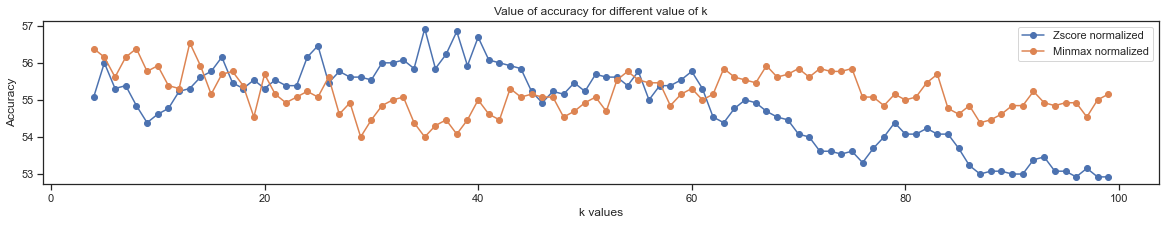

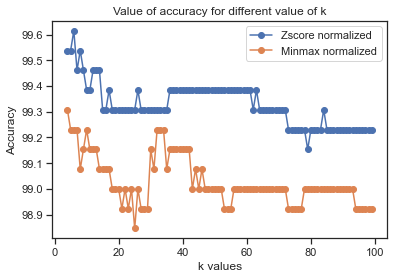

In [158]:
plt.figure(figsize=(20,3))
plt.plot(k_values, wine_quality_zscore_accuracies, marker='o')
plt.plot(k_values, wine_quality_minmax_accuracies, marker='o')

plt.xlabel("k values")
plt.ylabel("Accuracy")
plt.title("Value of accuracy for different value of k")
plt.legend(["Zscore normalized","Minmax normalized"])
plt.show()

plt.plot(k_values, wine_color_zscore_accuracies, marker='o')
plt.plot(k_values, wine_color_minmax_accuracies, marker='o')

plt.xlabel("k values")
plt.ylabel("Accuracy")
plt.title("Value of accuracy for different value of k")
plt.legend(["Zscore normalized","Minmax normalized"])

In [159]:
# Finding the maximum accuracy
quality_zscore_max_accuracy = max(wine_quality_zscore_accuracies)
quality_minmax_max_accuracy = max(wine_quality_minmax_accuracies)

color_zscore_max_accuracy = max(wine_color_zscore_accuracies)
color_minmax_max_accuracy = max(wine_color_minmax_accuracies)

# Finding the best value of k
quality_zscore_best_k = k_values[wine_quality_zscore_accuracies.index(quality_zscore_max_accuracy)]
quality_minmax_best_k = k_values[wine_quality_minmax_accuracies.index(quality_minmax_max_accuracy)]

color_zscore_best_k = k_values[wine_color_zscore_accuracies.index(color_zscore_max_accuracy)]
color_minmax_best_k = k_values[wine_color_minmax_accuracies.index(color_minmax_max_accuracy)]

print("*** [Quality] Best value of k for zscore = {} ***".format(quality_zscore_best_k))
print("*** [Quality] Best value of k for minmax = {} ***".format(quality_minmax_best_k))

print("*** [Color] Best value of k for zscore = {} ***".format(color_zscore_best_k))
print("*** [Color] Best value of k for minmax = {} ***".format(color_minmax_best_k))

*** [Quality] Best value of k for zscore = 35 ***
*** [Quality] Best value of k for minmax = 13 ***
*** [Color] Best value of k for zscore = 6 ***
*** [Color] Best value of k for minmax = 4 ***


### 4. Improving on KNN: You can try to improve on your classification results using the method of weighted KNN. The KNeighborsClassifier class has an option for weighted KNN where points that are nearby to the query point are more important for the classification than others. Compare the three different weighting schemes (default, manhattan, euclidean) by plotting accuracy vs k for all three of them on the same figure to see the effect.

In [160]:
## Storing the accuracies for different k-values and different weighting parameters
wine_quality_zscore_accuracies_manhattan = []
wine_quality_zscore_accuracies_euclidean = []
wine_quality_minmax_accuracies_manhattan = []
wine_quality_minmax_accuracies_euclidean = []

wine_color_zscore_accuracies_manhattan = []
wine_color_zscore_accuracies_euclidean = []
wine_color_minmax_accuracies_manhattan = []
wine_color_minmax_accuracies_euclidean = []

# Using 'knn_classify' wrapper function defined above
for k in k_values:
    ''' Quality '''
    acc1_m = knn_classify(wine_quality_zscore_X_train, wine_quality_zscore_X_test, wine_quality_zscore_y_train, wine_quality_zscore_y_test,k,"m")
    acc1_e = knn_classify(wine_quality_zscore_X_train, wine_quality_zscore_X_test, wine_quality_zscore_y_train, wine_quality_zscore_y_test,k,"e")
    
    acc2_m = knn_classify(wine_quality_minmax_X_train, wine_quality_minmax_X_test, wine_quality_minmax_y_train, wine_quality_minmax_y_test,k,"m")
    acc2_e = knn_classify(wine_quality_minmax_X_train, wine_quality_minmax_X_test, wine_quality_minmax_y_train, wine_quality_minmax_y_test,k,"e")
    
    wine_quality_zscore_accuracies_manhattan.append(acc1_m)
    wine_quality_zscore_accuracies_euclidean.append(acc1_e)

    wine_quality_minmax_accuracies_manhattan.append(acc2_m)
    wine_quality_minmax_accuracies_euclidean.append(acc2_e)

    ''' Color '''
    acc1_m = knn_classify(wine_color_zscore_X_train, wine_color_zscore_X_test, wine_color_zscore_y_train, wine_color_zscore_y_test,k,"m")
    acc1_e = knn_classify(wine_color_zscore_X_train, wine_color_zscore_X_test, wine_color_zscore_y_train, wine_color_zscore_y_test,k,"e")
    
    acc2_m = knn_classify(wine_color_minmax_X_train, wine_color_minmax_X_test, wine_color_minmax_y_train, wine_color_minmax_y_test,k,"m")
    acc2_e = knn_classify(wine_color_minmax_X_train, wine_color_minmax_X_test, wine_color_minmax_y_train, wine_color_minmax_y_test,k,"e")
    
    wine_color_zscore_accuracies_manhattan.append(acc1_m)
    wine_color_zscore_accuracies_euclidean.append(acc1_e)

    wine_color_minmax_accuracies_manhattan.append(acc2_m)
    wine_color_minmax_accuracies_euclidean.append(acc2_e)

In [161]:
# Multiplying accuracies by 100 for better comparison
wine_quality_zscore_accuracies_manhattan = [x*100 for x in wine_quality_zscore_accuracies_manhattan] 
wine_quality_zscore_accuracies_euclidean = [x*100 for x in wine_quality_zscore_accuracies_euclidean] 
wine_quality_minmax_accuracies_manhattan = [x*100 for x in wine_quality_minmax_accuracies_manhattan] 
wine_quality_minmax_accuracies_euclidean = [x*100 for x in wine_quality_minmax_accuracies_euclidean] 

wine_color_zscore_accuracies_manhattan = [x*100 for x in wine_color_zscore_accuracies_manhattan] 
wine_color_zscore_accuracies_euclidean = [x*100 for x in wine_color_zscore_accuracies_euclidean] 
wine_color_minmax_accuracies_manhattan = [x*100 for x in wine_color_minmax_accuracies_manhattan] 
wine_color_minmax_accuracies_euclidean = [x*100 for x in wine_color_minmax_accuracies_euclidean]

*** Plot for Zscore normalized values (Quality) ***


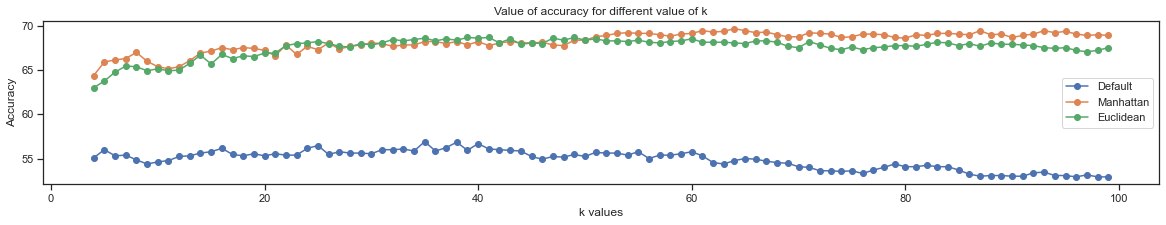

*** Plot for Minmax normalized values (Quality) ***


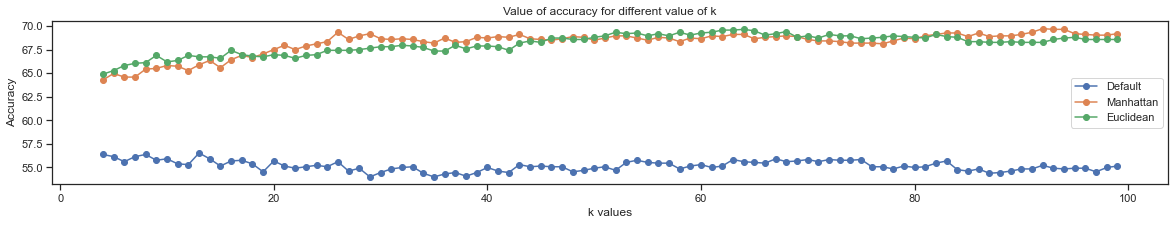

*** Plot for Zscore normalized values (Color) ***


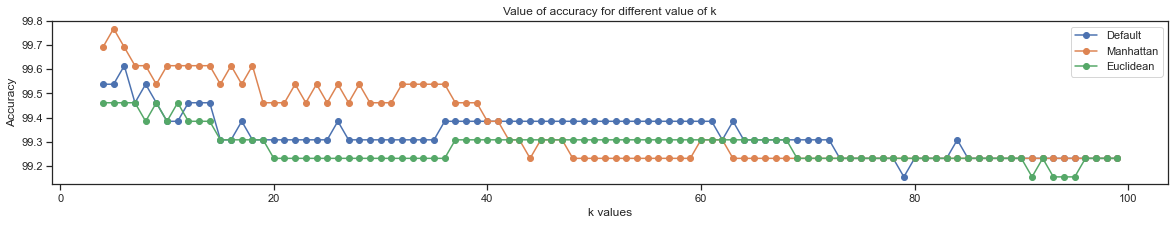

*** Plot for Minmax normalized values (Color) ***


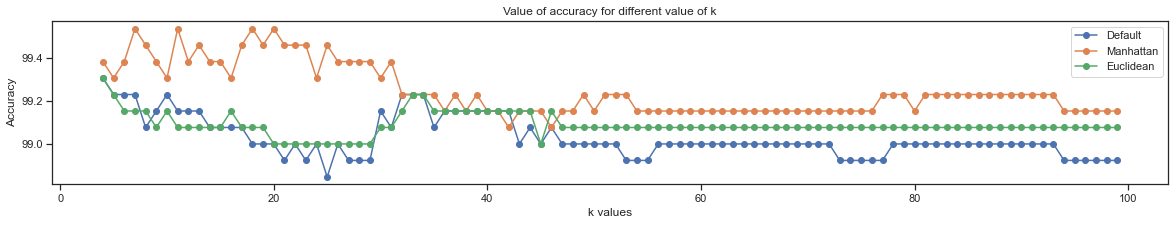

In [162]:
def accuracy_plot(default,manhattan,euclidean):
    plt.figure(figsize=(20,3))
    plt.plot(k_values, default, label='Default', marker='o')
    plt.plot(k_values, manhattan, label="Manhattan", marker='o')
    plt.plot(k_values, euclidean, label="Euclidean", marker='o')

    plt.xlabel("k values")
    plt.ylabel("Accuracy")
    plt.title("Value of accuracy for different value of k")
    plt.legend(["Default","Manhattan","Euclidean"])
    plt.show()

print("*** Plot for Zscore normalized values (Quality) ***")
accuracy_plot(wine_quality_zscore_accuracies,wine_quality_zscore_accuracies_manhattan,wine_quality_zscore_accuracies_euclidean)
print("*** Plot for Minmax normalized values (Quality) ***")
accuracy_plot(wine_quality_minmax_accuracies,wine_quality_minmax_accuracies_manhattan,wine_quality_minmax_accuracies_euclidean)

print("*** Plot for Zscore normalized values (Color) ***")
accuracy_plot(wine_color_zscore_accuracies,wine_color_zscore_accuracies_manhattan,wine_color_zscore_accuracies_euclidean)
print("*** Plot for Minmax normalized values (Color) ***")
accuracy_plot(wine_color_minmax_accuracies,wine_color_minmax_accuracies_manhattan,wine_color_minmax_accuracies_euclidean)

In [163]:
# ***** Finding the maximum accuracy

''' Quality '''
quality_zscore_max_accuracy_manhattan = max(wine_quality_zscore_accuracies_manhattan)
quality_zscore_max_accuracy_euclidean = max(wine_quality_zscore_accuracies_euclidean)

print("*** [Quality] Best accuracy from zscore = {} ***".format(max(quality_zscore_max_accuracy,quality_zscore_max_accuracy_manhattan,quality_zscore_max_accuracy_euclidean)))

quality_minmax_max_accuracy_manhattan = max(wine_quality_minmax_accuracies_manhattan)
quality_minmax_max_accuracy_euclidean = max(wine_quality_minmax_accuracies_euclidean)

print("*** [Quality] Best accuracy from minmax = {} ***".format(max(quality_minmax_max_accuracy,quality_minmax_max_accuracy_manhattan,quality_minmax_max_accuracy_euclidean)))

''' Color '''
color_zscore_max_accuracy_manhattan = max(wine_color_zscore_accuracies_manhattan)
color_zscore_max_accuracy_euclidean = max(wine_color_zscore_accuracies_euclidean)

print("*** [Color] Best accuracy from zscore = {} ***".format(max(color_zscore_max_accuracy,color_zscore_max_accuracy_manhattan,color_zscore_max_accuracy_euclidean)))

color_minmax_max_accuracy_manhattan = max(wine_color_minmax_accuracies_manhattan)
color_minmax_max_accuracy_euclidean = max(wine_color_minmax_accuracies_euclidean)

print("*** [Color] Best accuracy from minmax = {} ***".format(max(color_minmax_max_accuracy,color_minmax_max_accuracy_manhattan,color_minmax_max_accuracy_euclidean)))

print("\n\n")
# ***** Finding the best value of k

''' Quality '''
quality_zscore_best_k_manhattan = k_values[wine_quality_zscore_accuracies_manhattan.index(quality_zscore_max_accuracy_manhattan)]
quality_zscore_best_k_euclidean = k_values[wine_quality_zscore_accuracies_euclidean.index(quality_zscore_max_accuracy_euclidean)]

quality_minmax_best_k_manhattan = k_values[wine_quality_minmax_accuracies_manhattan.index(quality_minmax_max_accuracy_manhattan)]
quality_minmax_best_k_euclidean = k_values[wine_quality_minmax_accuracies_euclidean.index(quality_minmax_max_accuracy_euclidean)]

print("*** [Quality] Best value of k for zscore for manhattan distance metric= {} ***".format(quality_zscore_best_k_manhattan))
print("*** [Quality] Best value of k for zscore for euclidean distance metric= {} ***".format(quality_zscore_best_k_euclidean))

print("*** [Quality] Best value of k for minmax for manhattan distance metric= {} ***".format(quality_minmax_best_k_manhattan))
print("*** [Quality] Best value of k for minmax for euclidean distance metric= {} ***".format(quality_minmax_best_k_euclidean))

''' Color '''
color_zscore_best_k_manhattan = k_values[wine_color_zscore_accuracies_manhattan.index(color_zscore_max_accuracy_manhattan)]
color_zscore_best_k_euclidean = k_values[wine_color_zscore_accuracies_euclidean.index(color_zscore_max_accuracy_euclidean)]

color_minmax_best_k_manhattan = k_values[wine_color_minmax_accuracies_manhattan.index(color_minmax_max_accuracy_manhattan)]
color_minmax_best_k_euclidean = k_values[wine_color_minmax_accuracies_euclidean.index(color_minmax_max_accuracy_euclidean)]

print("*** [Color] Best value of k for zscore for manhattan distance metric= {} ***".format(color_zscore_best_k_manhattan))
print("*** [Color] Best value of k for zscore for euclidean distance metric= {} ***".format(color_zscore_best_k_euclidean))

print("*** [Color] Best value of k for minmax for manhattan distance metric= {} ***".format(color_minmax_best_k_manhattan))
print("*** [Color] Best value of k for minmax for euclidean distance metric= {} ***".format(color_minmax_best_k_euclidean))

*** [Quality] Best accuracy from zscore = 69.6923076923077 ***
*** [Quality] Best accuracy from minmax = 69.76923076923077 ***
*** [Color] Best accuracy from zscore = 99.76923076923076 ***
*** [Color] Best accuracy from minmax = 99.53846153846155 ***



*** [Quality] Best value of k for zscore for manhattan distance metric= 64 ***
*** [Quality] Best value of k for zscore for euclidean distance metric= 39 ***
*** [Quality] Best value of k for minmax for manhattan distance metric= 92 ***
*** [Quality] Best value of k for minmax for euclidean distance metric= 64 ***
*** [Color] Best value of k for zscore for manhattan distance metric= 5 ***
*** [Color] Best value of k for zscore for euclidean distance metric= 4 ***
*** [Color] Best value of k for minmax for manhattan distance metric= 7 ***
*** [Color] Best value of k for minmax for euclidean distance metric= 4 ***


### 5 Ablation Study on Normalization: An ablation study is where some aspect of the model or analysis is dropped, in order to see what its effect was on the entire outcome. We can do a simple form of ablation here by removing normalization from our pipeline. Replot the three curves from the previous question on weighted KNN, but this time remove the normalization step from the preprocessing. Comment on the difference, was normalization effective or necessary in this case?

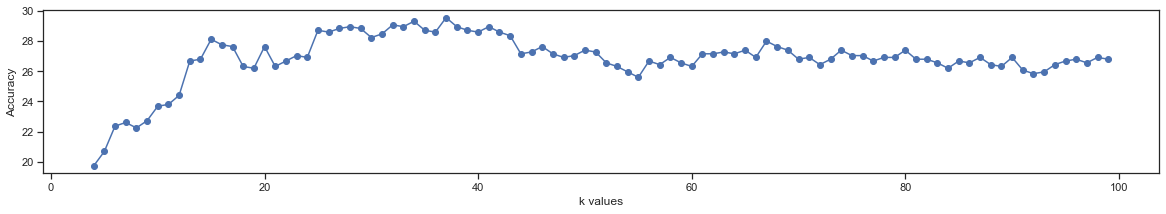

*** Plot for Unnormalized values ***


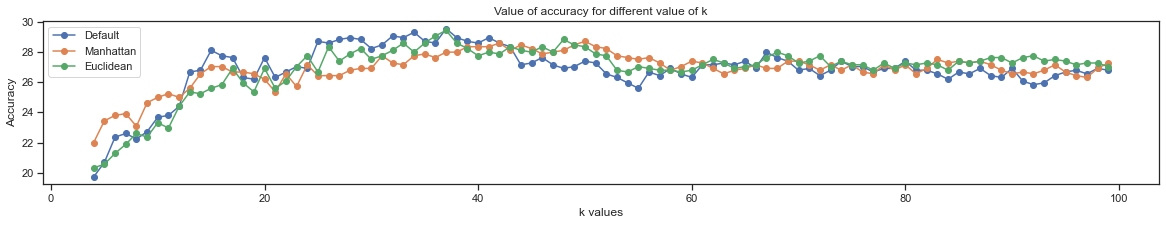

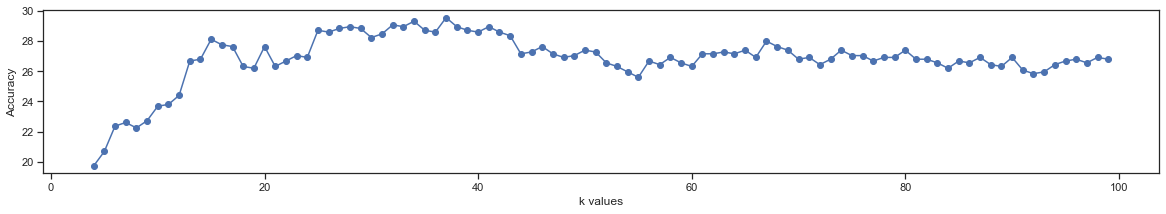

*** Plot for Unnormalized values ***


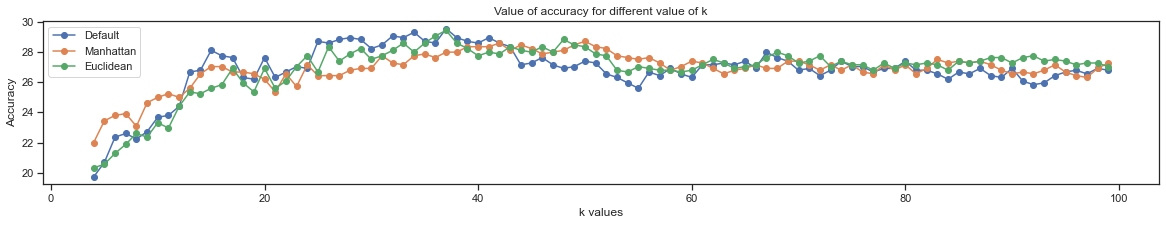

In [164]:
# For quality
abalone_unnormal_X_train, abalone_unnormal_X_test, abalone_unnormal_y_train, abalone_unnormal_y_test = generate_train_test_splits(abalone_dataframe_unnormal,abalone_target)
abalone_unnormal_accuracy = knn_classify(abalone_unnormal_X_train, abalone_unnormal_X_test, abalone_unnormal_y_train, abalone_unnormal_y_test)

abalone_unnormal_accuracies = []
for k in k_values:
    acc1 = knn_classify(abalone_unnormal_X_train, abalone_unnormal_X_test, abalone_unnormal_y_train, abalone_unnormal_y_test,k)
    abalone_unnormal_accuracies.append(acc1)    
    
abalone_unnormal_accuracies = [x*100 for x in abalone_unnormal_accuracies]
plt.figure(figsize=(20,3))
plt.plot(k_values, abalone_unnormal_accuracies, marker='o')
plt.xlabel("k values")
plt.ylabel("Accuracy")
plt.show()

abalone_unnormal_accuracies_manhattan = []
abalone_unnormal_accuracies_euclidean = []

for k in k_values:
    acc1_m = knn_classify(abalone_unnormal_X_train, abalone_unnormal_X_test, abalone_unnormal_y_train, abalone_unnormal_y_test,k,"m")
    acc1_e = knn_classify(abalone_unnormal_X_train, abalone_unnormal_X_test, abalone_unnormal_y_train, abalone_unnormal_y_test,k,"e")
    abalone_unnormal_accuracies_manhattan.append(acc1_m)
    abalone_unnormal_accuracies_euclidean.append(acc1_e)

abalone_unnormal_accuracies_manhattan = [x*100 for x in abalone_unnormal_accuracies_manhattan] 
abalone_unnormal_accuracies_euclidean = [x*100 for x in abalone_unnormal_accuracies_euclidean]

print("*** Plot for Unnormalized values ***")
accuracy_plot(abalone_unnormal_accuracies,abalone_unnormal_accuracies_manhattan,abalone_unnormal_accuracies_euclidean)

# For color
abalone_unnormal_X_train, abalone_unnormal_X_test, abalone_unnormal_y_train, abalone_unnormal_y_test = generate_train_test_splits(abalone_dataframe_unnormal,abalone_target)
abalone_unnormal_accuracy = knn_classify(abalone_unnormal_X_train, abalone_unnormal_X_test, abalone_unnormal_y_train, abalone_unnormal_y_test)

abalone_unnormal_accuracies = []
for k in k_values:
    acc1 = knn_classify(abalone_unnormal_X_train, abalone_unnormal_X_test, abalone_unnormal_y_train, abalone_unnormal_y_test,k)
    abalone_unnormal_accuracies.append(acc1)    
    
abalone_unnormal_accuracies = [x*100 for x in abalone_unnormal_accuracies]
plt.figure(figsize=(20,3))
plt.plot(k_values, abalone_unnormal_accuracies, marker='o')
plt.xlabel("k values")
plt.ylabel("Accuracy")
plt.show()

abalone_unnormal_accuracies_manhattan = []
abalone_unnormal_accuracies_euclidean = []

for k in k_values:
    acc1_m = knn_classify(abalone_unnormal_X_train, abalone_unnormal_X_test, abalone_unnormal_y_train, abalone_unnormal_y_test,k,"m")
    acc1_e = knn_classify(abalone_unnormal_X_train, abalone_unnormal_X_test, abalone_unnormal_y_train, abalone_unnormal_y_test,k,"e")
    abalone_unnormal_accuracies_manhattan.append(acc1_m)
    abalone_unnormal_accuracies_euclidean.append(acc1_e)

abalone_unnormal_accuracies_manhattan = [x*100 for x in abalone_unnormal_accuracies_manhattan] 
abalone_unnormal_accuracies_euclidean = [x*100 for x in abalone_unnormal_accuracies_euclidean]

print("*** Plot for Unnormalized values ***")
accuracy_plot(abalone_unnormal_accuracies,abalone_unnormal_accuracies_manhattan,abalone_unnormal_accuracies_euclidean)

### 5 Ablation Study on Normalization: An ablation study is where some aspect of the model or analysis is dropped, in order to see what its effect was on the entire outcome. We can do a simple form of ablation here by removing normalization from our pipeline. Replot the three curves from the previous question on weighted KNN, but this time remove the normalization step from the preprocessing. Comment on the difference, was normalization effective or necessary in this case?

*** Quality ***


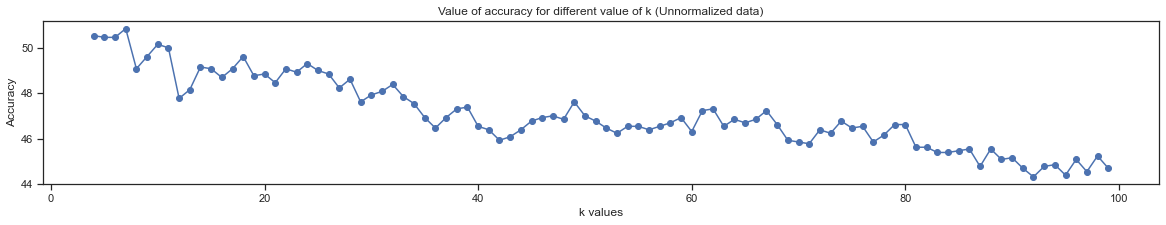

*** Plot for Unnormalized values ***


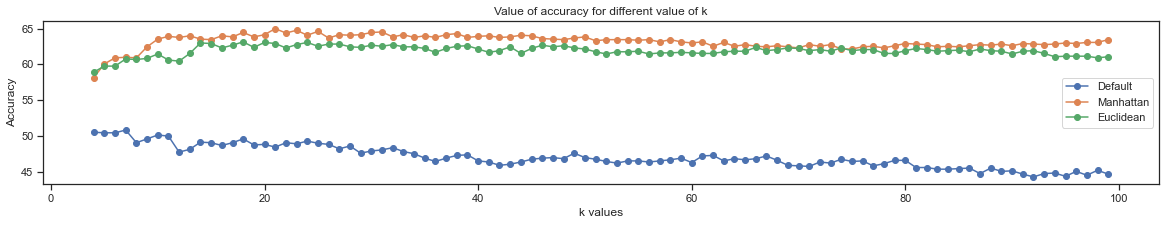

*** Color ***


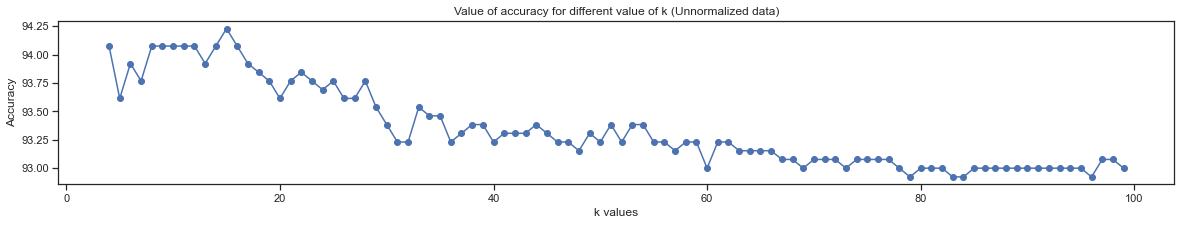

*** Plot for Unnormalized values ***


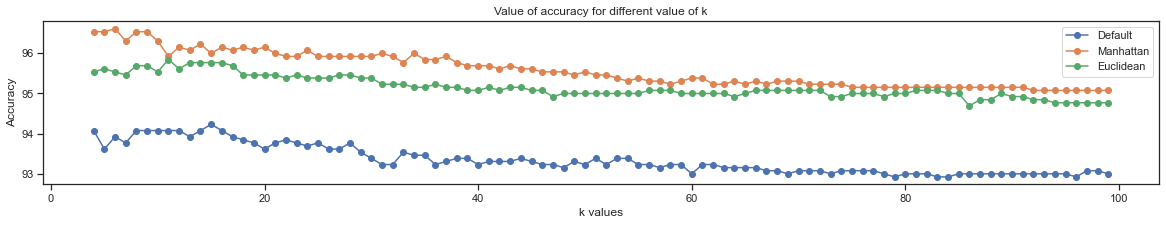

In [168]:
''' Quality '''
print("*** Quality ***")
# Splitting unnormalized data into training and testing set
wine_quality_unnormal_X_train, wine_quality_unnormal_X_test, wine_quality_unnormal_y_train, wine_quality_unnormal_y_test = generate_train_test_splits(wine_quality_dataframe_unnormal,wine_target1)
# Calculating accuracy
wine_quality_unnormal_accuracy = knn_classify(wine_quality_unnormal_X_train, wine_quality_unnormal_X_test, wine_quality_unnormal_y_train, wine_quality_unnormal_y_test)

wine_quality_unnormal_accuracies = []
for k in k_values:
    acc1 = knn_classify(wine_quality_unnormal_X_train, wine_quality_unnormal_X_test, wine_quality_unnormal_y_train, wine_quality_unnormal_y_test,k)
    wine_quality_unnormal_accuracies.append(acc1)    
    
wine_quality_unnormal_accuracies = [x*100 for x in wine_quality_unnormal_accuracies]
plt.figure(figsize=(20,3))
plt.plot(k_values, wine_quality_unnormal_accuracies, marker='o')
plt.xlabel("k values")
plt.ylabel("Accuracy")
plt.title("Value of accuracy for different value of k (Unnormalized data)")
plt.show()

# Trying manhatten and euclidean metrics for unnormalized data
wine_quality_unnormal_accuracies_manhattan = []
wine_quality_unnormal_accuracies_euclidean = []

for k in k_values:
    acc1_m = knn_classify(wine_quality_unnormal_X_train, wine_quality_unnormal_X_test, wine_quality_unnormal_y_train, wine_quality_unnormal_y_test,k,"m")
    acc1_e = knn_classify(wine_quality_unnormal_X_train, wine_quality_unnormal_X_test, wine_quality_unnormal_y_train, wine_quality_unnormal_y_test,k,"e")
    wine_quality_unnormal_accuracies_manhattan.append(acc1_m)
    wine_quality_unnormal_accuracies_euclidean.append(acc1_e)

wine_quality_unnormal_accuracies_manhattan = [x*100 for x in wine_quality_unnormal_accuracies_manhattan] 
wine_quality_unnormal_accuracies_euclidean = [x*100 for x in wine_quality_unnormal_accuracies_euclidean]

print("*** Plot for Unnormalized values ***")
accuracy_plot(wine_quality_unnormal_accuracies,wine_quality_unnormal_accuracies_manhattan,wine_quality_unnormal_accuracies_euclidean)

''' Color '''
print("*** Color ***")
# Splitting unnormalized data into training and testing set
wine_color_unnormal_X_train, wine_color_unnormal_X_test, wine_color_unnormal_y_train, wine_color_unnormal_y_test = generate_train_test_splits(wine_color_dataframe_unnormal,wine_target2)
# Calculating accuracy
wine_color_unnormal_accuracy = knn_classify(wine_color_unnormal_X_train, wine_color_unnormal_X_test, wine_color_unnormal_y_train, wine_color_unnormal_y_test)

wine_color_unnormal_accuracies = []
for k in k_values:
    acc1 = knn_classify(wine_color_unnormal_X_train, wine_color_unnormal_X_test, wine_color_unnormal_y_train, wine_color_unnormal_y_test,k)
    wine_color_unnormal_accuracies.append(acc1)    
    
wine_color_unnormal_accuracies = [x*100 for x in wine_color_unnormal_accuracies]
plt.figure(figsize=(20,3))
plt.plot(k_values, wine_color_unnormal_accuracies, marker='o')
plt.xlabel("k values")
plt.ylabel("Accuracy")
plt.title("Value of accuracy for different value of k (Unnormalized data)")
plt.show()

# Trying manhatten and euclidean metrics for unnormalized data
wine_color_unnormal_accuracies_manhattan = []
wine_color_unnormal_accuracies_euclidean = []

for k in k_values:
    acc1_m = knn_classify(wine_color_unnormal_X_train, wine_color_unnormal_X_test, wine_color_unnormal_y_train, wine_color_unnormal_y_test,k,"m")
    acc1_e = knn_classify(wine_color_unnormal_X_train, wine_color_unnormal_X_test, wine_color_unnormal_y_train, wine_color_unnormal_y_test,k,"e")
    wine_color_unnormal_accuracies_manhattan.append(acc1_m)
    wine_color_unnormal_accuracies_euclidean.append(acc1_e)

wine_color_unnormal_accuracies_manhattan = [x*100 for x in wine_color_unnormal_accuracies_manhattan] 
wine_color_unnormal_accuracies_euclidean = [x*100 for x in wine_color_unnormal_accuracies_euclidean]

print("*** Plot for Unnormalized values ***")
accuracy_plot(wine_color_unnormal_accuracies,wine_color_unnormal_accuracies_manhattan,wine_color_unnormal_accuracies_euclidean)

In [166]:
''' Quality '''
print("*** Quality ***")
# Finding the maximum accuracy
unnormal_max_accuracy = max(wine_quality_unnormal_accuracies)
unnormal_max_accuracy_manhattan = max(wine_quality_unnormal_accuracies_manhattan)
unnormal_max_accuracy_euclidean = max(wine_quality_unnormal_accuracies_euclidean)

print("*** Best accuracy from unnormalized data = {} ***".format(max(unnormal_max_accuracy,unnormal_max_accuracy_manhattan,unnormal_max_accuracy_euclidean)))

# Finding the best value of k
unnormal_best_k = k_values[wine_quality_unnormal_accuracies.index(unnormal_max_accuracy)]
unnormal_best_k_manhattan = k_values[wine_quality_unnormal_accuracies_manhattan.index(unnormal_max_accuracy_manhattan)]
unnormal_best_k_euclidean = k_values[wine_quality_unnormal_accuracies_euclidean.index(unnormal_max_accuracy_euclidean)]

print("*** Best value of k for unnormalized distance metric= {} ***".format(unnormal_best_k))
print("*** Best value of k for unnormalized for manhattan distance metric= {} ***".format(unnormal_best_k_manhattan))
print("*** Best value of k for unnormalized for euclidean distance metric= {} ***".format(unnormal_best_k_euclidean))

print("\n\n")

''' Color '''
print("*** Color ***")
# Finding the maximum accuracy
unnormal_max_accuracy = max(wine_color_unnormal_accuracies)
unnormal_max_accuracy_manhattan = max(wine_color_unnormal_accuracies_manhattan)
unnormal_max_accuracy_euclidean = max(wine_color_unnormal_accuracies_euclidean)

print("*** Best accuracy from unnormalized data = {} ***".format(max(unnormal_max_accuracy,unnormal_max_accuracy_manhattan,unnormal_max_accuracy_euclidean)))

# Finding the best value of k
unnormal_best_k = k_values[wine_color_unnormal_accuracies.index(unnormal_max_accuracy)]
unnormal_best_k_manhattan = k_values[wine_color_unnormal_accuracies_manhattan.index(unnormal_max_accuracy_manhattan)]
unnormal_best_k_euclidean = k_values[wine_color_unnormal_accuracies_euclidean.index(unnormal_max_accuracy_euclidean)]

print("*** Best value of k for unnormalized distance metric= {} ***".format(unnormal_best_k))
print("*** Best value of k for unnormalized for manhattan distance metric= {} ***".format(unnormal_best_k_manhattan))
print("*** Best value of k for unnormalized for euclidean distance metric= {} ***".format(unnormal_best_k_euclidean))

*** Quality ***
*** Best accuracy from unnormalized data = 65.0 ***
*** Best value of k for unnormalized distance metric= 7 ***
*** Best value of k for unnormalized for manhattan distance metric= 21 ***
*** Best value of k for unnormalized for euclidean distance metric= 18 ***



*** Color ***
*** Best accuracy from unnormalized data = 96.61538461538461 ***
*** Best value of k for unnormalized distance metric= 15 ***
*** Best value of k for unnormalized for manhattan distance metric= 6 ***
*** Best value of k for unnormalized for euclidean distance metric= 11 ***


Conclusion: <br><br>
[For quality]<br>
Best accuracy from zscore = 68.61538461538461 <br>
Best accuracy from minmax = 68.6923076923077<br>
Best accuracy from unnormalized data = 61.15384615384616<br>
<br>
[For color]<br>
Best accuracy from zscore = 99.76923076923076 <br>
Best accuracy from minmax = 99.53846153846155<br>
Best accuracy from unnormalized data = 97.15384615384616<br>
**It is evident that we are achieving more accuracy with normalized value therefore normalization is effective here**

### References

[1] KNeighborsClassifier; https://scikit-learn.org/stable/modules/generated/sklearn.neighbors

[2] Compare the effect of different scalers on data with outliers — scikit-learn 0.22.1 documentation. (n.d.). Retrieved February 17, 2020, from https://scikitlearn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py
https://scikitlearn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py

[3] Scatter Plot; Date accessed: 3rd Feb; https://en.wikipedia.org/wiki/Scatter_plot